<a href="https://colab.research.google.com/github/Yefes2/CENG-464_DataMining_Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Ignore ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

pd.set_option('future.no_silent_downcasting', True)

Importing the Files

In [ ]:
# Upload the files
from google.colab import files
uploaded = files.upload()

# Load the data into pandas DataFrames
data_processed = pd.read_excel('Data_processed.xlsx')  # Replace with the correct file name

# Check the first few rows to verify
data_processed.head()



Saving Data_processed.xlsx to Data_processed (1).xlsx


,GrainYield,District_Ara,District_Begusarai,District_Buxar,District_Deoria,District_EastChamparan,District_Kushinagar,District_Lakhisarai,District_Madhepura,District_Muzaffarpur,...,HerbicideMonth,HerbicideDay,HerbicideWeekNum,HarvestYear,HarvestMonth,HarvestDay,HarvestWeekNum,DaysFromZerotoSowing,DaysFromSowingToHerbicide,DaysFromHerbicideToHarvest
0,A,0,0,1,0,0,0,0,0,0,...,11.0,28.0,49.0,2017,4,21,16,258,58.0,144.0
1,A,0,0,1,0,0,0,0,0,0,...,11.0,28.0,49.0,2017,4,24,17,258,58.0,147.0
2,B,0,0,0,0,1,0,0,0,0,...,12.0,12.0,51.0,2017,4,15,15,298,32.0,124.0
3,A,0,0,0,0,1,0,0,0,0,...,12.0,12.0,51.0,2017,4,18,16,298,32.0,127.0
4,A,0,0,0,0,1,0,0,0,0,...,12.0,12.0,51.0,2017,4,15,15,298,32.0,124.0


**Data Preprocessing**


Data Analysis

In [ ]:
data_processed.describe()


,District_Ara,District_Begusarai,District_Buxar,District_Deoria,District_EastChamparan,District_Kushinagar,District_Lakhisarai,District_Madhepura,District_Muzaffarpur,District_Rohtas,...,HerbicideMonth,HerbicideDay,HerbicideWeekNum,HarvestYear,HarvestMonth,HarvestDay,HarvestWeekNum,DaysFromZerotoSowing,DaysFromSowingToHerbicide,DaysFromHerbicideToHarvest
count,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,...,3512.000000,3514.000000,3512.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3512.000000,3512.000000
mean,0.089157,0.066399,0.111379,0.107631,0.159036,0.100402,0.079786,0.127175,0.080589,0.078447,...,7.317483,15.933125,30.447323,2019.131995,3.990629,13.419009,15.526104,314.093708,30.160592,105.532460
std,0.285008,0.249011,0.314643,0.309955,0.365759,0.300575,0.270998,0.333214,0.272239,0.268910,...,5.423689,8.624456,23.825772,1.281269,0.096361,6.655403,0.987496,15.544356,4.589545,16.288015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,2017.000000,3.000000,1.000000,13.000000,258.000000,-8.000000,60.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,9.000000,3.000000,2018.000000,4.000000,8.000000,15.000000,299.000000,29.000000,93.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,16.000000,49.000000,2019.000000,4.000000,13.000000,16.000000,312.000000,32.000000,107.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,23.000000,51.000000,2020.000000,4.000000,18.000000,16.000000,328.000000,32.000000,118.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.000000,31.000000,53.000000,2021.000000,4.000000,31.000000,18.000000,347.000000,58.000000,153.000000


In [ ]:
# Custom function to display DataFrame information in the desired format
def custom_info(data_processed):
    # Get non-null count and dtype for each column
    non_null_count = data_processed.count()
    dtype = data_processed.dtypes

    # Create a formatted output
    print(f"<class 'pandas.core.frame.DataFrame'>")
    print(f"RangeIndex: {len(data_processed)} entries, 0 to {len(data_processed)-1}")
    print(f"Data columns (total {len(data_processed.columns)} columns):")
    print(f" #   Column         Non-Null Count  Dtype ")
    print(f"---  ------         --------------  ----- ")

    for idx, column in enumerate(data_processed.columns):
        print(f" {idx:<3} {column:<15} {non_null_count[column]:<15} {dtype[column]}")

# Display custom information about the data
custom_info(data_processed)

data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 120 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GrainYield      3735            object
 1   District_Ara    3735            int64
 2   District_Begusarai 3735            int64
 3   District_Buxar  3735            int64
 4   District_Deoria 3735            int64
 5   District_EastChamparan 3735            int64
 6   District_Kushinagar 3735            int64
 7   District_Lakhisarai 3735            int64
 8   District_Madhepura 3735            int64
 9   District_Muzaffarpur 3735            int64
 10  District_Rohtas 3735            int64
 11  State_Bihar     3735            int64
 12  State_UP        3735            int64
 13  LandType_Lowland 3735            int64
 14  LandType_MediumLand 3735            int64
 15  LandType_Upland 3735            int64
 16  SoilType_Heavy  3735            int64
 17  SoilType_Low    3735            int64


In [ ]:
data_processed["GrainYield"].value_counts()

,count
GrainYield,
B,1862
A,967
C,906


In [ ]:
# Finding the unique types of attributes for choosing and creating dependent dataframes. 2 per person.
categorical_groups = {
    "State": [col for col in data_processed.columns if "State_" in col],
    "SoilType": [col for col in data_processed.columns if "SoilType_" in col],
    "LandType": [col for col in data_processed.columns if "LandType_" in col],
    "SowingSchedule": [col for col in data_processed.columns if "SowingSchedule_" in col],
    "VarietyClass": [col for col in data_processed.columns if "VarietyClass_" in col],
    "CropEstablishment": [col for col in data_processed.columns if "CropEstablishment_" in col]
}

# Checking Categorical groups
print("Categorical Groups:", categorical_groups)

Categorical Groups: {'State': ['State_Bihar', 'State_UP'], 'SoilType': ['SoilType_Heavy', 'SoilType_Low', 'SoilType_Medium'], 'LandType': ['LandType_Lowland', 'LandType_MediumLand', 'LandType_Upland'], 'SowingSchedule': ['SowingSchedule_T1', 'SowingSchedule_T2', 'SowingSchedule_T3', 'SowingSchedule_T4', 'SowingSchedule_T5'], 'VarietyClass': ['VarietyClass_LDV', 'VarietyClass_SDV'], 'CropEstablishment': ['CropEstablishment_CT', 'CropEstablishment_CT_line', 'CropEstablishment_ZT']}


In [ ]:
state_bihar_counts = data_processed["State_Bihar"].value_counts()
state_up_counts = data_processed["State_UP"].value_counts()

# Combine them into a DataFrame
state_counts_df = pd.DataFrame({
    "State_Bihar": state_bihar_counts,
    "State_UP": state_up_counts
})

# Display the combined DataFrame
print(state_counts_df)

   State_Bihar  State_UP
0          777      2958
1         2958       777


In [ ]:
# Get the value counts for each SoilType
soil_type_heavy_counts = data_processed["SoilType_Heavy"].value_counts()
soil_type_low_counts = data_processed["SoilType_Low"].value_counts()
soil_type_medium_counts = data_processed["SoilType_Medium"].value_counts()

# Combine them into a DataFrame
soil_type_counts_df = pd.DataFrame({
    "SoilType_Heavy": soil_type_heavy_counts,
    "SoilType_Low": soil_type_low_counts,
    "SoilType_Medium": soil_type_medium_counts
})

# Display the combined DataFrame
print(soil_type_counts_df)


   SoilType_Heavy  SoilType_Low  SoilType_Medium
0            2949          3647              874
1             786            88             2861


In [ ]:
# Get the value counts for each LandType
land_type_lowland_counts = data_processed["LandType_Lowland"].value_counts()
land_type_medium_land_counts = data_processed["LandType_MediumLand"].value_counts()
land_type_upland_counts = data_processed["LandType_Upland"].value_counts()

# Combine them into a DataFrame
land_type_counts_df = pd.DataFrame({
    "LandType_Lowland": land_type_lowland_counts,
    "LandType_MediumLand": land_type_medium_land_counts,
    "LandType_Upland": land_type_upland_counts
})

# Display the combined DataFrame
print(land_type_counts_df)


   LandType_Lowland  LandType_MediumLand  LandType_Upland
0              2619                 1288             3563
1              1116                 2447              172


In [ ]:
# Get the value counts for each SowingSchedule
sowing_schedule_t1_counts = data_processed["SowingSchedule_T1"].value_counts()
sowing_schedule_t2_counts = data_processed["SowingSchedule_T2"].value_counts()
sowing_schedule_t3_counts = data_processed["SowingSchedule_T3"].value_counts()
sowing_schedule_t4_counts = data_processed["SowingSchedule_T4"].value_counts()
sowing_schedule_t5_counts = data_processed["SowingSchedule_T5"].value_counts()

# Combine them into a DataFrame
sowing_schedule_counts_df = pd.DataFrame({
    "SowingSchedule_T1": sowing_schedule_t1_counts,
    "SowingSchedule_T2": sowing_schedule_t2_counts,
    "SowingSchedule_T3": sowing_schedule_t3_counts,
    "SowingSchedule_T4": sowing_schedule_t4_counts,
    "SowingSchedule_T5": sowing_schedule_t5_counts
})

# Display the combined DataFrame
print(sowing_schedule_counts_df)


   SowingSchedule_T1  SowingSchedule_T2  SowingSchedule_T3  SowingSchedule_T4  \
0               3324               2872               2900               2827   
1                411                863                835                908   

   SowingSchedule_T5  
0               3017  
1                718  


In [ ]:
# Get the value counts for each VarietyClass
variety_class_ldv_counts = data_processed["VarietyClass_LDV"].value_counts()
variety_class_sdv_counts = data_processed["VarietyClass_SDV"].value_counts()

# Combine them into a DataFrame
variety_class_counts_df = pd.DataFrame({
    "VarietyClass_LDV": variety_class_ldv_counts,
    "VarietyClass_SDV": variety_class_sdv_counts
})

# Display the combined DataFrame
print(variety_class_counts_df)


   VarietyClass_LDV  VarietyClass_SDV
0              1106              2629
1              2629              1106


In [ ]:
# Get the value counts for each CropEstablishment category
crop_establishment_ct_counts = data_processed["CropEstablishment_CT"].value_counts()
crop_establishment_ct_line_counts = data_processed["CropEstablishment_CT_line"].value_counts()
crop_establishment_zt_counts = data_processed["CropEstablishment_ZT"].value_counts()

# Combine them into a DataFrame
crop_establishment_counts_df = pd.DataFrame({
    "CropEstablishment_CT": crop_establishment_ct_counts,
    "CropEstablishment_CT_line": crop_establishment_ct_line_counts,
    "CropEstablishment_ZT": crop_establishment_zt_counts
})

# Display the combined DataFrame
print(crop_establishment_counts_df)


   CropEstablishment_CT  CropEstablishment_CT_line  CropEstablishment_ZT
0                  3661                       3719                    90
1                    74                         16                  3645


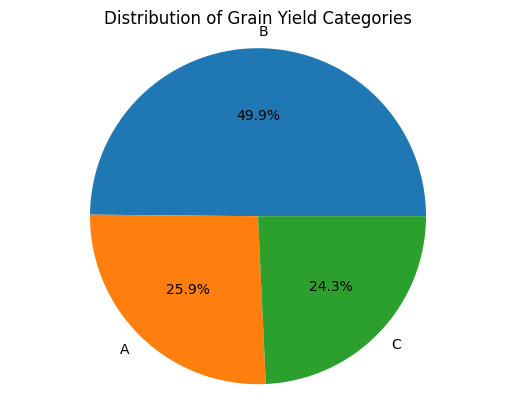

In [ ]:
# Plot pie chart for GrainYield distribution
data_processed["GrainYield"].value_counts().plot.pie(autopct='%1.1f%%')

# Add title and axis label
plt.title("Distribution of Grain Yield Categories")
plt.ylabel('')  # No need for y-axis label in a pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

Handling the missing data


In [ ]:
data_processed.fillna(data_processed.mode().iloc[0], inplace=True)

In [ ]:
print("Missing Data Analysis:")
missing_values = data_processed.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Data:\n", missing_values)

# Eksik veri oranlarını da görmek için:
missing_percentage = (data_processed.isnull().sum() / len(data_processed)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print("\nMissing Data Percentage (%):")
print(missing_percentage)

#Data is ready!
from google.colab import files

Missing Data Analysis:
Missing Data:
 Series([], dtype: int64)

Missing Data Percentage (%):
Series([], dtype: float64)


In [ ]:
#Labeling the GrainYield for easier categorization of dataframes (When It's needed)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_processed['GrainYield'] = le.fit_transform(data_processed['GrainYield'])

# Check for non-numeric values in your dataset
non_numeric_columns = data_processed.select_dtypes(include=['object']).columns
print("Non-numeric columns:\n", non_numeric_columns)

# Inspect the unique values in these columns
for col in non_numeric_columns:
    print(f"Unique values in column {col}:\n", data_processed[col].unique())


Non-numeric columns:
 Index(['Longitude'], dtype='object')
Unique values in column Longitude:
 [83.866 84.59 84.805 84.603 84.591 85.409 85.36 85.371 84 83.92 83.73
 83.97 84.053 83.96 84.048 84.078 84.03 83.87 84.597 84.054 84.01 84.834
 84.798 83.86 84.047 83.9 84.608 84.04 84.05 83.72 84.06 84.07 84.044
 84.042 84.043 84.046 84.052 84.049 84.045 84.061 84.041 83.91 84.241
 84.386 83.93 84.064 84.062 84.387 84.059 84.037 83.445 83.436 84.693
 84.564 84.565 86.028 85.935 86.227 86.071 86.024 86.229 86.171 86.157
 86.54 86.156 86.1 86.2 86 86.132 84.369 84.367 84.318 84.317 84.446
 84.581 84.299 84.172 84.256 84.3 83.994 84.211 84.231 85.41 85.419 85.42
 85.418 85.417 85.665 85.415 85.411 85.666 85.344 85.336 84.563 86.235
 84.316 85.421 84.833 84.933 84.648 86.114 84.445 84.426 84.091 84.095
 85.343 84.999 84.974 84.202 86.261 83.848 84.21 84.604 84.562 83.929
 84.344 84.154 83.913 85.358 84.453 84.319 83.909 84.454 86.203 86.204
 86.15 84.366 84.199 84.558 84.222 84.228 84.279 84.23 

In [ ]:
# Replace non-breaking spaces and other problematic characters
data_processed = data_processed.replace('\xa0', '', regex=True)

# Convert all non-numeric columns to numeric where applicable
for col in non_numeric_columns:
    data_processed[col] = pd.to_numeric(data_processed[col], errors='coerce')

In [ ]:
# Her alt veri setindeki sınıf dağılımını kontrol et
for group, cols in categorical_groups.items():
    for col in cols:
        subset = data_processed[data_processed[col] == 1]
        if not subset.empty:
            print(f"\nKategori: {col}")
            print(subset['GrainYield'].value_counts())


Kategori: State_Bihar
GrainYield
1    1470
0     795
2     693
Name: count, dtype: int64

Kategori: State_UP
GrainYield
1    392
2    213
0    172
Name: count, dtype: int64

Kategori: SoilType_Heavy
GrainYield
1    330
0    238
2    218
Name: count, dtype: int64

Kategori: SoilType_Low
GrainYield
1    40
2    35
0    13
Name: count, dtype: int64

Kategori: SoilType_Medium
GrainYield
1    1492
0     716
2     653
Name: count, dtype: int64

Kategori: LandType_Lowland
GrainYield
1    469
2    428
0    219
Name: count, dtype: int64

Kategori: LandType_MediumLand
GrainYield
1    1305
0     686
2     456
Name: count, dtype: int64

Kategori: LandType_Upland
GrainYield
1    88
0    62
2    22
Name: count, dtype: int64

Kategori: SowingSchedule_T1
GrainYield
0    202
1    193
2     16
Name: count, dtype: int64

Kategori: SowingSchedule_T2
GrainYield
1    435
0    370
2     58
Name: count, dtype: int64

Kategori: SowingSchedule_T3
GrainYield
1    525
0    186
2    124
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# SMOTE ile veri dengelenmesi
randomsampler = SMOTE(random_state=42)

y = data_processed['GrainYield']
x = data_processed.drop(['GrainYield'], axis=1)

x_resampled, y_resampled = randomsampler.fit_resample(x, y)

# Yeni veriyi birleştirirken pd.concat kullanımı
balanced_data = pd.concat([pd.DataFrame(x_resampled, columns=x.columns),
                           pd.DataFrame(y_resampled, columns=['GrainYield'])], axis=1)

In [ ]:
# One-Hot Encoded sütunları tespit et
one_hot_columns = [col for col in data_processed.columns if set(data_processed[col].unique()).issubset({0, 1})]

print("One-Hot Encoded Sütunlar:", one_hot_columns)

One-Hot Encoded Sütunlar: ['District_Ara', 'District_Begusarai', 'District_Buxar', 'District_Deoria', 'District_EastChamparan', 'District_Kushinagar', 'District_Lakhisarai', 'District_Madhepura', 'District_Muzaffarpur', 'District_Rohtas', 'State_Bihar', 'State_UP', 'LandType_Lowland', 'LandType_MediumLand', 'LandType_Upland', 'SoilType_Heavy', 'SoilType_Low', 'SoilType_Medium', 'PreviousCrop_Fallow', 'PreviousCrop_Maize', 'PreviousCrop_Rice', 'PreviousCrop_Soybean', 'CropEstablishment_CT', 'CropEstablishment_CT_line', 'CropEstablishment_ZT', 'Variety_BHU_25', 'Variety_DBW_187', 'Variety_DBW_252', 'Variety_HD_2733', 'Variety_HD_2824', 'Variety_HD_2967', 'Variety_HD_2985', 'Variety_HD_3086', 'Variety_HD_3226', 'Variety_HI3118', 'Variety_HI_1563', 'Variety_HUW_234', 'Variety_LOK_1', 'Variety_PBW_154', 'Variety_PBW_343', 'Variety_PBW_373', 'Variety_PBW_550', 'Variety_Super_303', 'VarietyClass_LDV', 'VarietyClass_SDV', 'SowingSchedule_T1', 'SowingSchedule_T2', 'SowingSchedule_T3', 'SowingSc

In [ ]:
# Tüm sayısal sütunları tespit et
numerical_features = data_processed.select_dtypes(include=['float64', 'int64']).columns

# Sürekli sayısal sütunlar (One-Hot Encoded sütunlar hariç)
numerical_features_for_scaling = [col for col in numerical_features if col not in one_hot_columns and col != 'GrainYield']

print("MinMax Scaling için Sürekli Sayısal Sütunlar:", numerical_features_for_scaling)


MinMax Scaling için Sürekli Sayısal Sütunlar: ['Longitude', 'Latitude', 'PrevCropResidue', 'SeedRate', 'BasalDAP', 'BasalNPK', 'BasalMOP', 'BasalZn', 'Split1Urea', 'Split2Urea', 'Split3Urea', 'IrrigationNumber', 'FirstIrrigationDay', 'SecondIrrigationDay', 'ThirdIrrigationDay', 'HerbicideDose', 'YearYear', 'YearDay', 'YearWeekNum', 'SowingYear', 'SowingMonth', 'SowingDay', 'SowingWeekNum', 'HerbicideYear', 'HerbicideMonth', 'HerbicideDay', 'HerbicideWeekNum', 'HarvestYear', 'HarvestMonth', 'HarvestDay', 'HarvestWeekNum', 'DaysFromZerotoSowing', 'DaysFromSowingToHerbicide', 'DaysFromHerbicideToHarvest']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMax Scaling için scaler oluştur
scaler = MinMaxScaler()

# Sürekli sayısal sütunlara ölçeklendirme uygula
balanced_data[numerical_features_for_scaling] = scaler.fit_transform(balanced_data[numerical_features_for_scaling])

print("Min-Max Scaling sonrası veri:")
print(balanced_data[numerical_features_for_scaling].head())

Min-Max Scaling sonrası veri:
   Longitude  Latitude  PrevCropResidue  SeedRate  BasalDAP  BasalNPK  \
0   0.311842  0.261509     4.444445e-01       0.0  0.941176  0.846590   
1   0.311842  0.261035     4.444445e-01       0.0  0.941176  0.846590   
2   0.447932  0.819649     3.124386e-09       0.0  0.941176  0.999999   
3   0.488346  0.786901     3.124386e-09       0.0  0.941176  0.749999   
4   0.450376  0.789274     3.124386e-09       0.0  0.941176  0.999999   

   BasalMOP   BasalZn  Split1Urea  Split2Urea  ...  HerbicideMonth  \
0  0.638095  0.324353         0.0    0.751491  ...        0.909091   
1  0.638095  0.246026         0.0    0.751491  ...        0.909091   
2  0.571429  0.241379         0.5    0.254473  ...        1.000000   
3  0.714286  0.241379         0.9    0.353877  ...        1.000000   
4  0.628571  0.241379         0.5    0.254473  ...        1.000000   

   HerbicideDay  HerbicideWeekNum  HarvestYear  HarvestMonth  HarvestDay  \
0      0.900000          0.923077 

In [ ]:
# Finding the unique types of attributes for choosing and creating dependent dataframes. 2 per person.
categorical_groups = {
    "State": [col for col in data_processed.columns if "State_" in col],
    "SoilType": [col for col in data_processed.columns if "SoilType_" in col],
    "LandType": [col for col in data_processed.columns if "LandType_" in col],
    "SowingSchedule": [col for col in data_processed.columns if "SowingSchedule_" in col],
    "VarietyClass": [col for col in data_processed.columns if "VarietyClass_" in col],
    "CropEstablishment": [col for col in data_processed.columns if "CropEstablishment_" in col]
}

# Checking Categorical groups
print("Categorical Groups:", categorical_groups)

Categorical Groups: {'State': ['State_Bihar', 'State_UP'], 'SoilType': ['SoilType_Heavy', 'SoilType_Low', 'SoilType_Medium'], 'LandType': ['LandType_Lowland', 'LandType_MediumLand', 'LandType_Upland'], 'SowingSchedule': ['SowingSchedule_T1', 'SowingSchedule_T2', 'SowingSchedule_T3', 'SowingSchedule_T4', 'SowingSchedule_T5'], 'VarietyClass': ['VarietyClass_LDV', 'VarietyClass_SDV'], 'CropEstablishment': ['CropEstablishment_CT', 'CropEstablishment_CT_line', 'CropEstablishment_ZT']}


In [ ]:
from sklearn.model_selection import train_test_split

# Alt veri setlerini ve train-test bölmelerini oluşturacak bir fonksiyon
def create_subsets_and_split(data, categorical_groups):
    subsets = {}  # Alt veri setlerini saklamak için bir sözlük
    train_test_splits = {}  # Train-test bölmelerini saklamak için bir sözlük

    # Her kategorik grup için işlem yap
    for group, cols in categorical_groups.items():
        for col in cols:
            # Sütunun 1 olduğu satırları seç (One-Hot Encoded olanlar)
            subset = data[data[col] == 1].copy()

            # Eğer alt küme boş değilse işlemlere devam et
            if not subset.empty:
                # Target variable (GrainYield) ve sınıf dağılımını kontrol et
                y = subset['GrainYield']

                # Stratified split için her sınıfın 2'den fazla örneği olup olmadığını kontrol et
                if y.value_counts().min() > 1:
                    # Train-test bölme
                    x = subset.drop(['GrainYield'], axis=1)
                    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

                    # Alt kümeyi ve train-test bölmelerini sakla
                    subsets[col] = subset
                    train_test_splits[col] = {
                        "x_train": x_train,
                        "x_test": x_test,
                        "y_train": y_train,
                        "y_test": y_test
                    }
                else:
                    print(f"Warning: Kategoride '{col}' sınıfında yeterli veri yok, split yapılmadı.")

    return subsets, train_test_splits

# Fonksiyonu çağır ve alt kümeleri oluştur
subsets, train_test_splits = create_subsets_and_split(balanced_data, categorical_groups)

# Örnek çıktı: Bir alt kümeyi ve onun train-test bölmelerini görüntüleme
for key in train_test_splits:
    print(f"\nKategori Türü: {key}")
    print(f"Train Boyutu: {train_test_splits[key]['x_train'].shape}, Test Boyutu: {train_test_splits[key]['x_test'].shape}")



Kategori Türü: State_Bihar
Train Boyutu: (3525, 119), Test Boyutu: (882, 119)

Kategori Türü: State_UP
Train Boyutu: (862, 119), Test Boyutu: (216, 119)

Kategori Türü: SoilType_Heavy
Train Boyutu: (844, 119), Test Boyutu: (211, 119)

Kategori Türü: SoilType_Low
Train Boyutu: (77, 119), Test Boyutu: (20, 119)

Kategori Türü: SoilType_Medium
Train Boyutu: (3252, 119), Test Boyutu: (814, 119)

Kategori Türü: LandType_Lowland
Train Boyutu: (1252, 119), Test Boyutu: (313, 119)

Kategori Türü: LandType_MediumLand
Train Boyutu: (2655, 119), Test Boyutu: (664, 119)

Kategori Türü: LandType_Upland
Train Boyutu: (152, 119), Test Boyutu: (38, 119)

Kategori Türü: SowingSchedule_T1
Train Boyutu: (448, 119), Test Boyutu: (112, 119)

Kategori Türü: SowingSchedule_T2
Train Boyutu: (906, 119), Test Boyutu: (227, 119)

Kategori Türü: SowingSchedule_T3
Train Boyutu: (837, 119), Test Boyutu: (210, 119)

Kategori Türü: SowingSchedule_T4
Train Boyutu: (1014, 119), Test Boyutu: (254, 119)

Kategori Türü: 

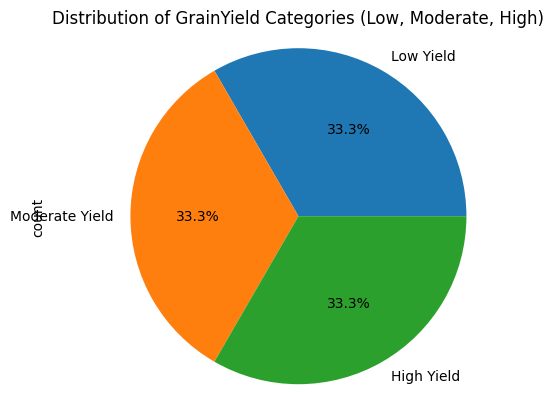

In [ ]:
balanced_data["GrainYield"].value_counts().plot.pie(autopct='%1.1f%%', labels=["Low Yield", "Moderate Yield", "High Yield"])

plt.title("Distribution of GrainYield Categories (Low, Moderate, High)")
plt.axis('equal')
plt.show()


Feature *Scaling*

In [ ]:
# Assuming your balanced data is stored in 'balanced_data'
X = balanced_data.drop(columns=['GrainYield'])  # All columns except the target
y = balanced_data['GrainYield']  # The target column

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes to confirm
print(X_train.shape)
print(X_test.shape)

# Optionally print the first few rows of the training data
print(X_train.head())


(4468, 119)
(1118, 119)
      District_Ara  District_Begusarai  District_Buxar  District_Deoria  \
4270             0                   0               0                0   
2384             0                   0               1                0   
1864             0                   0               0                0   
1173             0                   0               1                0   
1992             0                   0               0                0   

      District_EastChamparan  District_Kushinagar  District_Lakhisarai  \
4270                       0                    0                    0   
2384                       0                    0                    0   
1864                       1                    0                    0   
1173                       0                    0                    0   
1992                       0                    0                    0   

      District_Madhepura  District_Muzaffarpur  District_Rohtas  ...  \
4270    

In [ ]:
print(X_train)


      District_Ara  District_Begusarai  District_Buxar  District_Deoria  \
4270             0                   0               0                0   
2384             0                   0               1                0   
1864             0                   0               0                0   
1173             0                   0               1                0   
1992             0                   0               0                0   
...            ...                 ...             ...              ...   
3772             0                   0               0                0   
5191             0                   0               0                0   
5226             0                   1               0                0   
5390             0                   0               0                0   
860              0                   0               0                0   

      District_EastChamparan  District_Kushinagar  District_Lakhisarai  \
4270                     

Base Function for evaluating metrics


In [ ]:
from sklearn.metrics import (
    matthews_corrcoef, accuracy_score, classification_report, roc_auc_score,
    precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
)
import matplotlib.pyplot as plt
import pandas as pd

def evaluatePerformance(classifier, X_train, X_test, y_train, y_test):
    # Fit the model
    classifier.fit(X_train, y_train)

    # Predict the test set
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)  # For ROC and AUC

    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate Precision, Recall, F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate AUC (One-vs-Rest for multi-class)
    try:
        roc_auc = roc_auc_score(pd.get_dummies(y_test), y_pred_proba, average='macro', multi_class='ovr')
    except ValueError:
        roc_auc = None  # Handle classifiers that do not support probability prediction

    # Print Classification Report
    classification_report_result = classification_report(y_test, y_pred)
    print("Classification Report (Test Set):\n", classification_report_result)
    print(f"Matthews Corrcoef: {mcc:.4f}")
    print(f"Accuracy Score: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"AUC Score: {roc_auc:.4f}")

    # Plot ROC Curve (One vs All for multi-class)
    plt.figure(figsize=(10, 7))
    for class_label in range(len(set(y_test))):
        # Fit a one-vs-all classifier for each class
        y_train_bin = (y_train == class_label).astype(int)
        y_test_bin = (y_test == class_label).astype(int)

        classifier.fit(X_train, y_train_bin)
        y_score = classifier.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test_bin, y_score)
        roc_auc = auc(fpr, tpr)
        label = f'Class {class_label} (AUC = {roc_auc:.2f})'
        plt.plot(fpr, tpr, label=label)

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Classification Algorithms (Multi-Class)')
    plt.legend()
    plt.show()

    # Feature Importance (Top 5)
    try:
        importances = classifier.feature_importances_
        feature_names = X_train.columns
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False).head(5)

        print("\nTop 5 Features by Importance:")
        print(feature_importance)
    except AttributeError:
        print("\nFeature importance is not available for this classifier.")


Evaluating for Cross-Valdiation

In [ ]:
#Adding CrossValidation

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def evaluatePerformance_crossvalidation(classifier, X, y, cv=5):
    # Stratified k-fold cross-validation (General Setup = 5K)
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # Tahmin edilen değerler (cross-validation ile)
    y_pred = cross_val_predict(classifier, X, y, cv=skf, method='predict')
    y_pred_proba = cross_val_predict(classifier, X, y, cv=skf, method='predict_proba')

    # Performans Metrikleri
    mcc = matthews_corrcoef(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # AUC Skoru (One-vs-All için)
    try:
        roc_auc = roc_auc_score(pd.get_dummies(y), y_pred_proba, average='macro', multi_class='ovr')
    except ValueError:
        roc_auc = None  # Eğer model probability desteği yoksa

    # Classification Report
    classification_report_result = classification_report(y, y_pred)
    print("\nClassification Report (Cross-Validation):\n", classification_report_result)
    print(f"Matthews Corrcoef (CV): {mcc:.4f}")
    print(f"Accuracy (CV): {accuracy:.4f}")
    print(f"Precision (CV): {precision:.4f}")
    print(f"Recall (CV): {recall:.4f}")
    print(f"F1 Score (CV): {f1:.4f}")
    if roc_auc is not None:
        print(f"AUC Score (CV): {roc_auc:.4f}")

    # Sonuçları döndür
    return {
        "mcc": mcc,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc
    }


Evalutaing the performance of the models


Evaluation for KNeighborsClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       304
           1       0.74      0.73      0.74       294
           2       0.89      0.89      0.89       284

    accuracy                           0.81       882
   macro avg       0.81      0.81      0.81       882
weighted avg       0.81      0.81      0.81       882

Matthews Corrcoef: 0.7159
Accuracy Score: 0.8107
Precision: 0.8101
Recall: 0.8107
F1 Score: 0.8104
AUC Score: 0.9402

Cross Validation Results:
Fold 1: Accuracy=0.8333, Precision=0.8327, Recall=0.8336, F1=0.8327
Fold 2: Accuracy=0.8220, Precision=0.8209, Recall=0.8227, F1=0.8206
Fold 3: Accuracy=0.8150, Precision=0.8160, Recall=0.8158, F1=0.8149
Fold 4: Accuracy=0.8365, Precision=0.8370, Recall=0.8371, F1=0.8364
Fold 5: Accuracy=0.8456, Precision=0.8453, Recall=0.8464, F1=0.8457
Cross Validation Mean Accuracy: 0.8305
Cross Validation Mean P

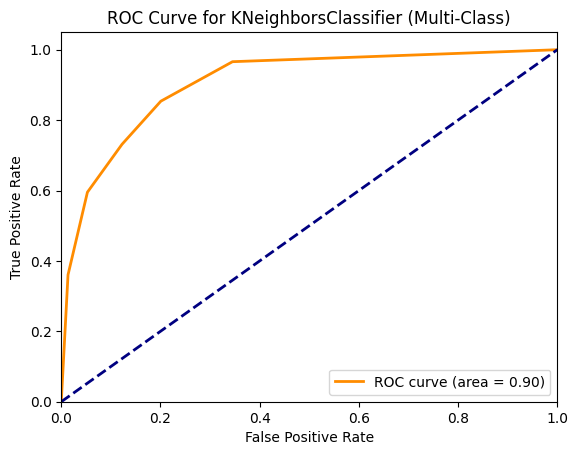

--------------------------------------------------------------------

Evaluation for DecisionTreeClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       304
           1       0.71      0.70      0.71       294
           2       0.87      0.88      0.88       284

    accuracy                           0.79       882
   macro avg       0.79      0.79      0.79       882
weighted avg       0.79      0.79      0.79       882

Matthews Corrcoef: 0.6853
Accuracy Score: 0.7902
Precision: 0.7894
Recall: 0.7902
F1 Score: 0.7898
AUC Score: 0.8431

Cross Validation Results:
Fold 1: Accuracy=0.7982, Precision=0.7995, Recall=0.7985, F1=0.7987
Fold 2: Accuracy=0.7846, Precision=0.7846, Recall=0.7858, F1=0.7851
Fold 3: Accuracy=0.7934, Precision=0.7969, Recall=0.7941, F1=0.7951
Fold 4: Accuracy=0.7605, Precision=0.7593, Recall=0.7616, F1=0.7603
Fold 5: Accuracy=0.7560, Precision=0.7559, Recall=0.7576, F

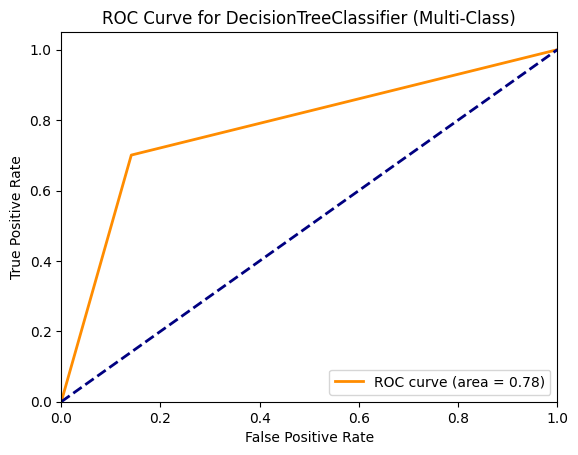

--------------------------------------------------------------------

Evaluation for RandomForestClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       304
           1       0.81      0.81      0.81       294
           2       0.90      0.93      0.92       284

    accuracy                           0.86       882
   macro avg       0.86      0.86      0.86       882
weighted avg       0.86      0.86      0.86       882

Matthews Corrcoef: 0.7944
Accuracy Score: 0.8628
Precision: 0.8626
Recall: 0.8628
F1 Score: 0.8625
AUC Score: 0.9519

Cross Validation Results:
Fold 1: Accuracy=0.8503, Precision=0.8503, Recall=0.8508, F1=0.8503
Fold 2: Accuracy=0.8515, Precision=0.8505, Recall=0.8524, F1=0.8509
Fold 3: Accuracy=0.8604, Precision=0.8607, Recall=0.8612, F1=0.8606
Fold 4: Accuracy=0.8695, Precision=0.8702, Recall=0.8702, F1=0.8702
Fold 5: Accuracy=0.8729, Precision=0.8722, Recall=0.8733, F

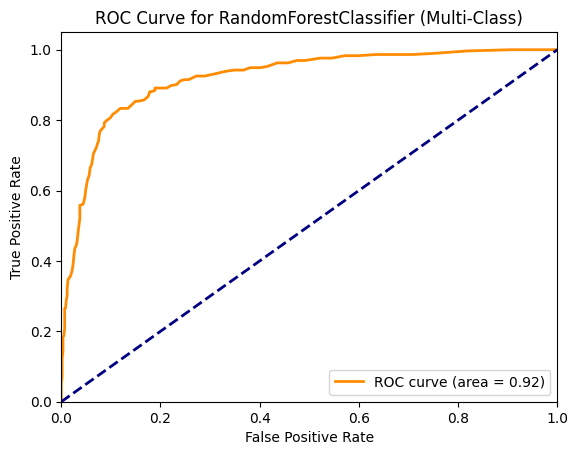

--------------------------------------------------------------------

Evaluation for SVC:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       304
           1       0.72      0.82      0.77       294
           2       0.87      0.86      0.87       284

    accuracy                           0.81       882
   macro avg       0.81      0.81      0.81       882
weighted avg       0.81      0.81      0.81       882

Matthews Corrcoef: 0.7131
Accuracy Score: 0.8073
Precision: 0.8131
Recall: 0.8073
F1 Score: 0.8079
AUC Score: 0.9310

Cross Validation Results:
Fold 1: Accuracy=0.8107, Precision=0.8114, Recall=0.8117, F1=0.8111
Fold 2: Accuracy=0.8016, Precision=0.8017, Recall=0.8030, F1=0.8018
Fold 3: Accuracy=0.8161, Precision=0.8174, Recall=0.8173, F1=0.8167
Fold 4: Accuracy=0.8275, Precision=0.8289, Recall=0.8290, F1=0.8280
Fold 5: Accuracy=0.8297, Precision=0.8312, Recall=0.8307, F1=0.8306
Cross Vali

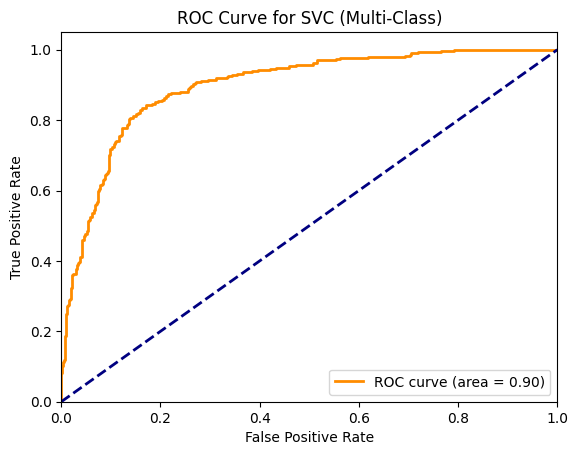

--------------------------------------------------------------------

Evaluation for MLPClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       304
           1       0.75      0.75      0.75       294
           2       0.91      0.88      0.89       284

    accuracy                           0.82       882
   macro avg       0.82      0.82      0.82       882
weighted avg       0.82      0.82      0.82       882

Matthews Corrcoef: 0.7329
Accuracy Score: 0.8220
Precision: 0.8229
Recall: 0.8220
F1 Score: 0.8224
AUC Score: 0.9435

Cross Validation Results:
Fold 1: Accuracy=0.8311, Precision=0.8301, Recall=0.8319, F1=0.8306
Fold 2: Accuracy=0.8322, Precision=0.8347, Recall=0.8333, F1=0.8336
Fold 3: Accuracy=0.8161, Precision=0.8199, Recall=0.8169, F1=0.8179
Fold 4: Accuracy=0.8547, Precision=0.8550, Recall=0.8554, F1=0.8552
Fold 5: Accuracy=0.8456, Precision=0.8455, Recall=0.8460, F1=0.8456


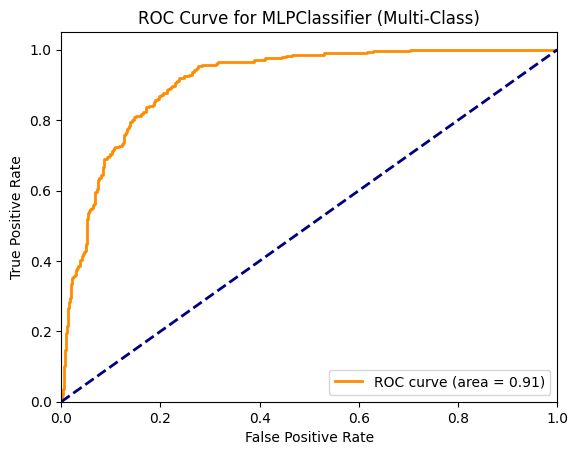

--------------------------------------------------------------------

Evaluation for CatBoostClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       304
           1       0.80      0.82      0.81       294
           2       0.92      0.92      0.92       284

    accuracy                           0.86       882
   macro avg       0.86      0.86      0.86       882
weighted avg       0.86      0.86      0.86       882

Matthews Corrcoef: 0.7925
Accuracy Score: 0.8617
Precision: 0.8622
Recall: 0.8617
F1 Score: 0.8619
AUC Score: 0.9554

Cross Validation Results:
Fold 1: Accuracy=0.8617, Precision=0.8625, Recall=0.8619, F1=0.8620
Fold 2: Accuracy=0.8503, Precision=0.8491, Recall=0.8510, F1=0.8497
Fold 3: Accuracy=0.8581, Precision=0.8584, Recall=0.8590, F1=0.8587
Fold 4: Accuracy=0.8797, Precision=0.8802, Recall=0.8804, F1=0.8803
Fold 5: Accuracy=0.8683, Precision=0.8680, Recall=0.8691, F1=0.

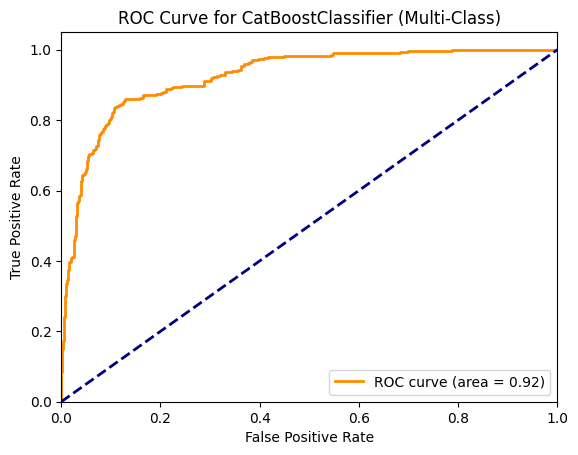

--------------------------------------------------------------------

Evaluation for LGBMClassifier:
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4246
[LightGBM] [Info] Number of data points in the train set: 3525, number of used features: 75
[LightGBM] [Info] Start training from score -1.066784
[LightGBM] [Info] Start training from score -1.097762
[LightGBM] [Info] Start training from score -1.132367

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       304
           1       0.79      0.80      0.80       294
           2       0.92      0.93      0.92       284

    accuracy                           0.86       882
   macro avg       0.86      0.86      0.86       882
weighted avg       0.86 

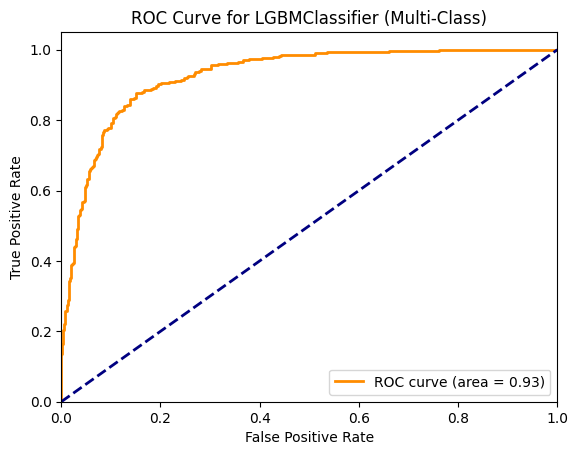

--------------------------------------------------------------------

Evaluation for ExtraTreesClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       304
           1       0.77      0.79      0.78       294
           2       0.90      0.90      0.90       284

    accuracy                           0.84       882
   macro avg       0.85      0.85      0.85       882
weighted avg       0.85      0.84      0.85       882

Matthews Corrcoef: 0.7671
Accuracy Score: 0.8447
Precision: 0.8456
Recall: 0.8447
F1 Score: 0.8450
AUC Score: 0.9510

Cross Validation Results:
Fold 1: Accuracy=0.8515, Precision=0.8520, Recall=0.8520, F1=0.8517
Fold 2: Accuracy=0.8435, Precision=0.8425, Recall=0.8447, F1=0.8431
Fold 3: Accuracy=0.8388, Precision=0.8396, Recall=0.8396, F1=0.8396
Fold 4: Accuracy=0.8706, Precision=0.8727, Recall=0.8712, F1=0.8717
Fold 5: Accuracy=0.8593, Precision=0.8585, Recall=0.8598, F1=

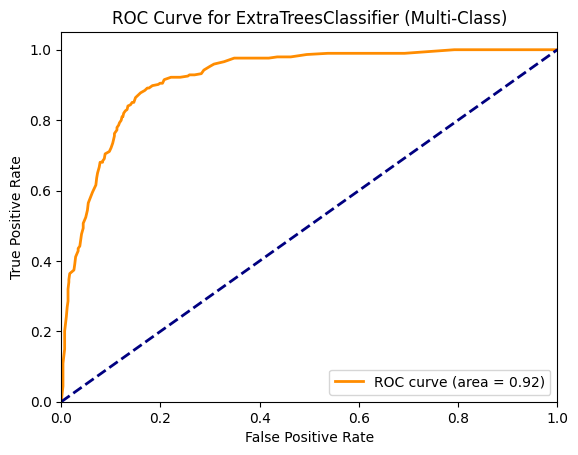

--------------------------------------------------------------------

Evaluation for BaggingClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       304
           1       0.78      0.73      0.75       294
           2       0.90      0.89      0.90       284

    accuracy                           0.83       882
   macro avg       0.83      0.83      0.83       882
weighted avg       0.83      0.83      0.83       882

Matthews Corrcoef: 0.7419
Accuracy Score: 0.8277
Precision: 0.8276
Recall: 0.8277
F1 Score: 0.8269
AUC Score: 0.9311

Cross Validation Results:
Fold 1: Accuracy=0.8322, Precision=0.8355, Recall=0.8322, F1=0.8322
Fold 2: Accuracy=0.8345, Precision=0.8348, Recall=0.8352, F1=0.8346
Fold 3: Accuracy=0.8297, Precision=0.8332, Recall=0.8301, F1=0.8310
Fold 4: Accuracy=0.8365, Precision=0.8371, Recall=0.8377, F1=0.8374
Fold 5: Accuracy=0.8331, Precision=0.8334, Recall=0.8336, F1=0.8

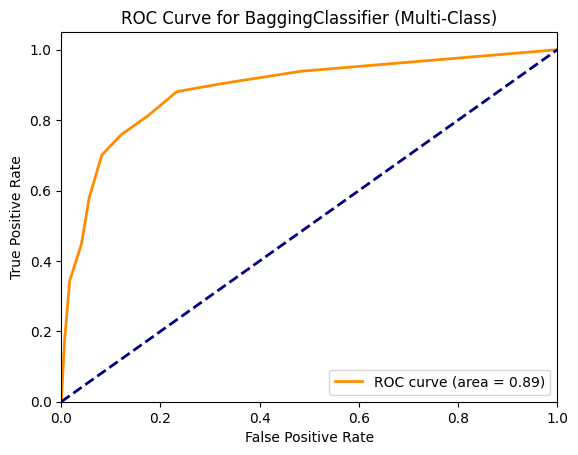

--------------------------------------------------------------------

Evaluation for HistGradientBoostingClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       304
           1       0.79      0.81      0.80       294
           2       0.92      0.93      0.92       284

    accuracy                           0.86       882
   macro avg       0.86      0.86      0.86       882
weighted avg       0.86      0.86      0.86       882

Matthews Corrcoef: 0.7875
Accuracy Score: 0.8583
Precision: 0.8585
Recall: 0.8583
F1 Score: 0.8583
AUC Score: 0.9559

Cross Validation Results:
Fold 1: Accuracy=0.8526, Precision=0.8534, Recall=0.8529, F1=0.8531
Fold 2: Accuracy=0.8526, Precision=0.8528, Recall=0.8533, F1=0.8530
Fold 3: Accuracy=0.8513, Precision=0.8523, Recall=0.8520, F1=0.8522
Fold 4: Accuracy=0.8672, Precision=0.8687, Recall=0.8680, F1=0.8682
Fold 5: Accuracy=0.8740, Precision=0.8735, Recall=0

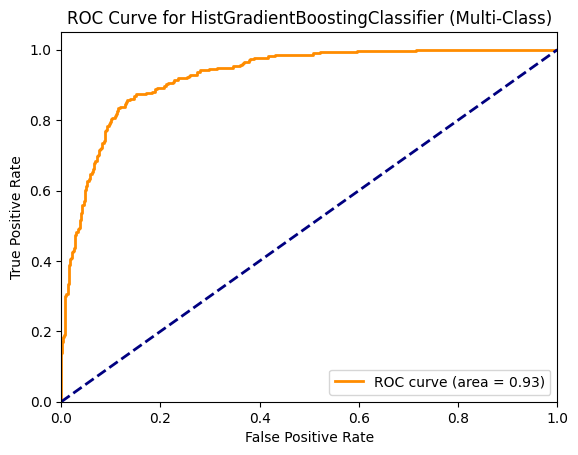

--------------------------------------------------------------------

Evaluation for KNeighborsClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.61      0.70      0.65        56
           1       0.73      0.58      0.65        79
           2       0.83      0.91      0.87        81

    accuracy                           0.74       216
   macro avg       0.72      0.73      0.72       216
weighted avg       0.74      0.74      0.73       216

Matthews Corrcoef: 0.6051
Accuracy Score: 0.7361
Precision: 0.7368
Recall: 0.7361
F1 Score: 0.7319
AUC Score: 0.8809

Cross Validation Results:
Fold 1: Accuracy=0.7917, Precision=0.7838, Recall=0.7872, F1=0.7847
Fold 2: Accuracy=0.7407, Precision=0.7342, Recall=0.7431, F1=0.7335
Fold 3: Accuracy=0.7454, Precision=0.7341, Recall=0.7254, F1=0.7280
Fold 4: Accuracy=0.8047, Precision=0.8006, Recall=0.8028, F1=0.7961
Fold 5: Accuracy=0.7814, Precision=0.7687, Recall=0.7717, F1=

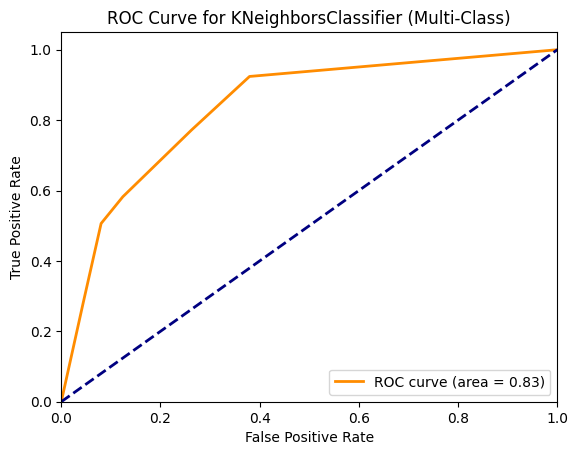

--------------------------------------------------------------------

Evaluation for DecisionTreeClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.62      0.52      0.56        56
           1       0.59      0.65      0.62        79
           2       0.81      0.83      0.82        81

    accuracy                           0.68       216
   macro avg       0.67      0.66      0.67       216
weighted avg       0.68      0.68      0.68       216

Matthews Corrcoef: 0.5126
Accuracy Score: 0.6806
Precision: 0.6796
Recall: 0.6806
F1 Score: 0.6785
AUC Score: 0.7507

Cross Validation Results:
Fold 1: Accuracy=0.7130, Precision=0.7097, Recall=0.6932, F1=0.6970
Fold 2: Accuracy=0.6667, Precision=0.6580, Recall=0.6564, F1=0.6571
Fold 3: Accuracy=0.7546, Precision=0.7384, Recall=0.7406, F1=0.7390
Fold 4: Accuracy=0.7256, Precision=0.7074, Recall=0.7000, F1=0.6983
Fold 5: Accuracy=0.7116, Precision=0.6955, Recall=0.6947, F

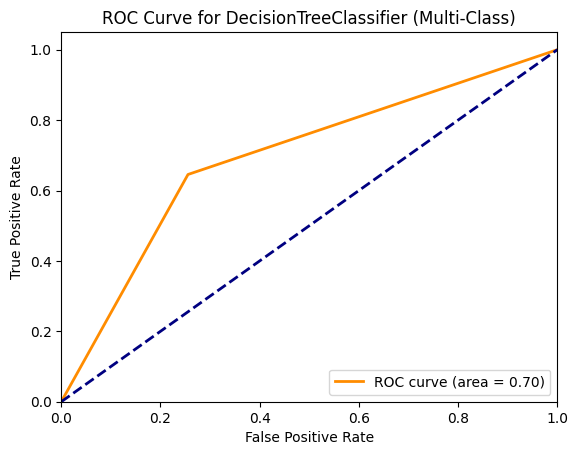

--------------------------------------------------------------------

Evaluation for RandomForestClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.71      0.64      0.67        56
           1       0.75      0.72      0.74        79
           2       0.85      0.94      0.89        81

    accuracy                           0.78       216
   macro avg       0.77      0.77      0.77       216
weighted avg       0.78      0.78      0.78       216

Matthews Corrcoef: 0.6692
Accuracy Score: 0.7824
Precision: 0.7775
Recall: 0.7824
F1 Score: 0.7787
AUC Score: 0.9237

Cross Validation Results:
Fold 1: Accuracy=0.8519, Precision=0.8457, Recall=0.8422, F1=0.8436
Fold 2: Accuracy=0.7500, Precision=0.7495, Recall=0.7435, F1=0.7460
Fold 3: Accuracy=0.7963, Precision=0.7868, Recall=0.7872, F1=0.7869
Fold 4: Accuracy=0.8047, Precision=0.8008, Recall=0.7908, F1=0.7924
Fold 5: Accuracy=0.7953, Precision=0.7812, Recall=0.7841, F

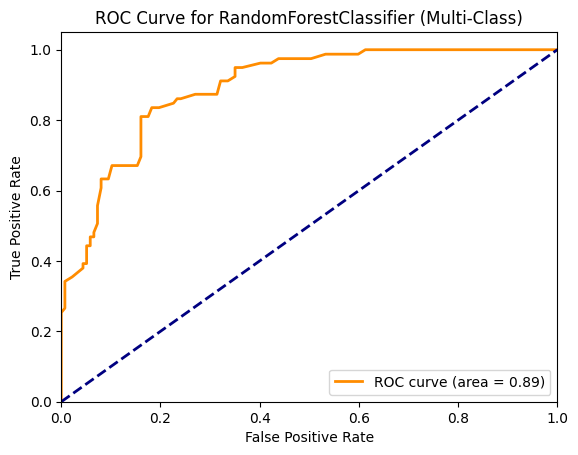

--------------------------------------------------------------------

Evaluation for SVC:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.60      0.45      0.51        56
           1       0.65      0.68      0.67        79
           2       0.79      0.89      0.84        81

    accuracy                           0.70       216
   macro avg       0.68      0.67      0.67       216
weighted avg       0.69      0.70      0.69       216

Matthews Corrcoef: 0.5406
Accuracy Score: 0.6991
Precision: 0.6890
Recall: 0.6991
F1 Score: 0.6901
AUC Score: 0.8763

Cross Validation Results:
Fold 1: Accuracy=0.7685, Precision=0.7565, Recall=0.7517, F1=0.7531
Fold 2: Accuracy=0.7315, Precision=0.7217, Recall=0.7183, F1=0.7191
Fold 3: Accuracy=0.7315, Precision=0.7175, Recall=0.7127, F1=0.7121
Fold 4: Accuracy=0.7721, Precision=0.7610, Recall=0.7493, F1=0.7501
Fold 5: Accuracy=0.7256, Precision=0.7068, Recall=0.7070, F1=0.7050
Cross Vali

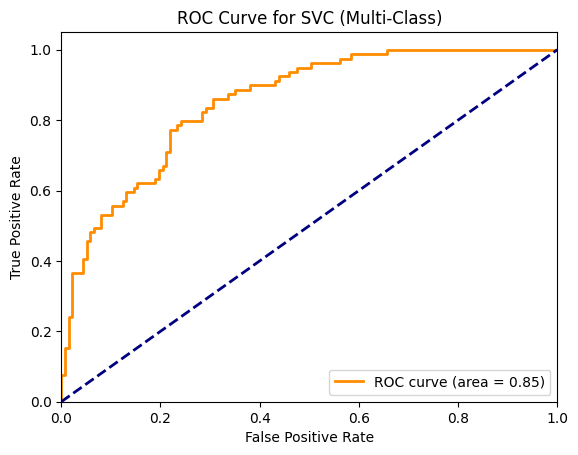

--------------------------------------------------------------------

Evaluation for MLPClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        56
           1       0.73      0.59      0.66        79
           2       0.83      0.94      0.88        81

    accuracy                           0.75       216
   macro avg       0.73      0.74      0.73       216
weighted avg       0.74      0.75      0.74       216

Matthews Corrcoef: 0.6178
Accuracy Score: 0.7454
Precision: 0.7426
Recall: 0.7454
F1 Score: 0.7398
AUC Score: 0.9049

Cross Validation Results:
Fold 1: Accuracy=0.8241, Precision=0.8207, Recall=0.8135, F1=0.8161
Fold 2: Accuracy=0.7361, Precision=0.7243, Recall=0.7290, F1=0.7255
Fold 3: Accuracy=0.7685, Precision=0.7588, Recall=0.7535, F1=0.7552
Fold 4: Accuracy=0.7767, Precision=0.7663, Recall=0.7606, F1=0.7621
Fold 5: Accuracy=0.7721, Precision=0.7670, Recall=0.7552, F1=0.7587


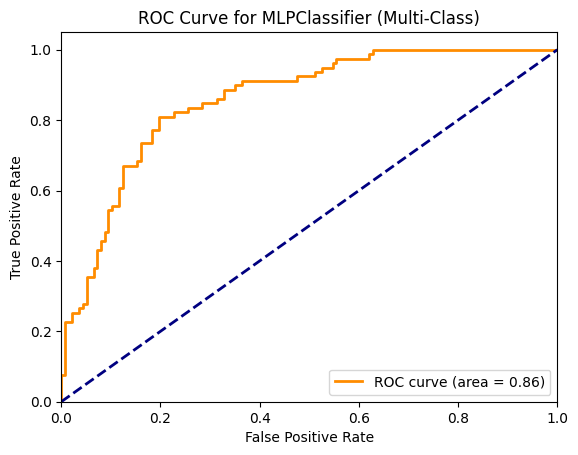

--------------------------------------------------------------------

Evaluation for CatBoostClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        56
           1       0.74      0.70      0.72        79
           2       0.85      0.93      0.89        81

    accuracy                           0.78       216
   macro avg       0.77      0.77      0.77       216
weighted avg       0.77      0.78      0.77       216

Matthews Corrcoef: 0.6627
Accuracy Score: 0.7778
Precision: 0.7739
Recall: 0.7778
F1 Score: 0.7749
AUC Score: 0.9219

Cross Validation Results:
Fold 1: Accuracy=0.8380, Precision=0.8353, Recall=0.8281, F1=0.8308
Fold 2: Accuracy=0.7593, Precision=0.7566, Recall=0.7551, F1=0.7557
Fold 3: Accuracy=0.8056, Precision=0.7972, Recall=0.8043, F1=0.7992
Fold 4: Accuracy=0.8233, Precision=0.8146, Recall=0.8109, F1=0.8102
Fold 5: Accuracy=0.8093, Precision=0.7963, Recall=0.7967, F1=0.

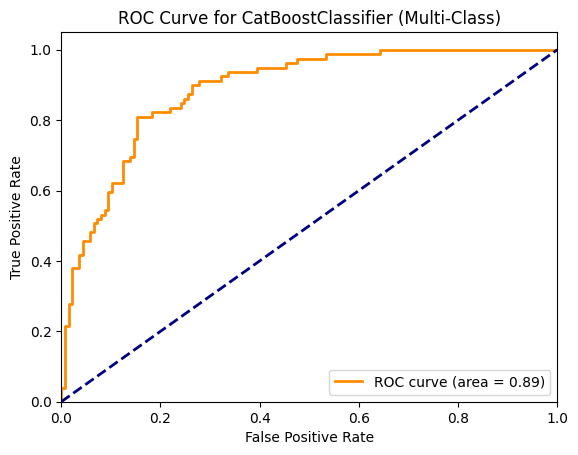

--------------------------------------------------------------------

Evaluation for LGBMClassifier:
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2288
[LightGBM] [Info] Number of data points in the train set: 862, number of used features: 57
[LightGBM] [Info] Start training from score -1.338720
[LightGBM] [Info] Start training from score -1.013052
[LightGBM] [Info] Start training from score -0.981603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.71      0.64      0.67        56
           1     

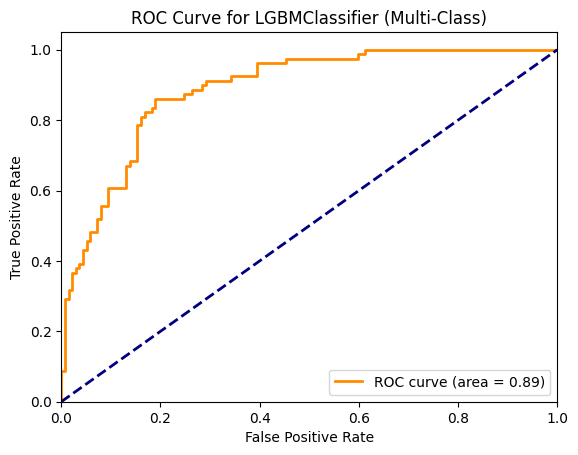

--------------------------------------------------------------------

Evaluation for ExtraTreesClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.68      0.64      0.66        56
           1       0.75      0.70      0.72        79
           2       0.84      0.94      0.89        81

    accuracy                           0.77       216
   macro avg       0.76      0.76      0.76       216
weighted avg       0.77      0.77      0.77       216

Matthews Corrcoef: 0.6558
Accuracy Score: 0.7731
Precision: 0.7683
Recall: 0.7731
F1 Score: 0.7693
AUC Score: 0.9198

Cross Validation Results:
Fold 1: Accuracy=0.8472, Precision=0.8455, Recall=0.8415, F1=0.8430
Fold 2: Accuracy=0.7685, Precision=0.7635, Recall=0.7635, F1=0.7635
Fold 3: Accuracy=0.8102, Precision=0.7998, Recall=0.8050, F1=0.8012
Fold 4: Accuracy=0.8233, Precision=0.8182, Recall=0.8149, F1=0.8154
Fold 5: Accuracy=0.8047, Precision=0.7950, Recall=0.7981, F1=

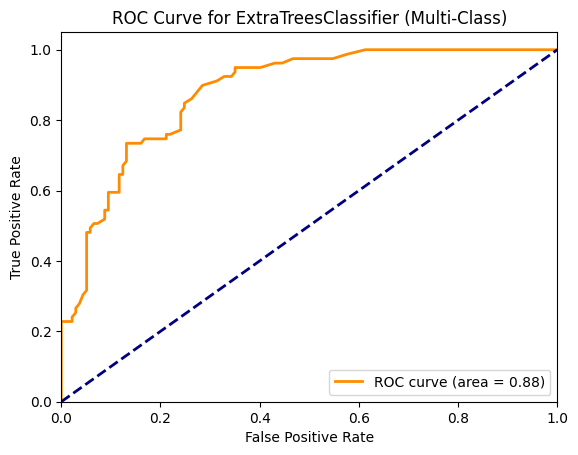

--------------------------------------------------------------------

Evaluation for BaggingClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.64      0.66      0.65        56
           1       0.69      0.66      0.68        79
           2       0.84      0.86      0.85        81

    accuracy                           0.74       216
   macro avg       0.72      0.73      0.73       216
weighted avg       0.74      0.74      0.74       216

Matthews Corrcoef: 0.6000
Accuracy Score: 0.7361
Precision: 0.7352
Recall: 0.7361
F1 Score: 0.7354
AUC Score: 0.8869

Cross Validation Results:
Fold 1: Accuracy=0.7685, Precision=0.7640, Recall=0.7599, F1=0.7616
Fold 2: Accuracy=0.6991, Precision=0.6936, Recall=0.7005, F1=0.6960
Fold 3: Accuracy=0.7917, Precision=0.7811, Recall=0.7865, F1=0.7820
Fold 4: Accuracy=0.8000, Precision=0.7900, Recall=0.7831, F1=0.7843
Fold 5: Accuracy=0.7953, Precision=0.7848, Recall=0.7911, F1=0.7

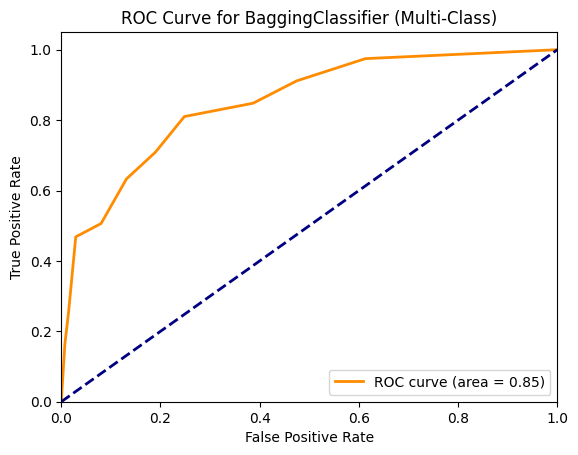

--------------------------------------------------------------------

Evaluation for HistGradientBoostingClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.71      0.66      0.69        56
           1       0.74      0.73      0.74        79
           2       0.86      0.91      0.89        81

    accuracy                           0.78       216
   macro avg       0.77      0.77      0.77       216
weighted avg       0.78      0.78      0.78       216

Matthews Corrcoef: 0.6689
Accuracy Score: 0.7824
Precision: 0.7791
Recall: 0.7824
F1 Score: 0.7802
AUC Score: 0.9152

Cross Validation Results:
Fold 1: Accuracy=0.8102, Precision=0.8062, Recall=0.8010, F1=0.8031
Fold 2: Accuracy=0.7315, Precision=0.7348, Recall=0.7251, F1=0.7290
Fold 3: Accuracy=0.7870, Precision=0.7775, Recall=0.7824, F1=0.7791
Fold 4: Accuracy=0.8326, Precision=0.8244, Recall=0.8195, F1=0.8197
Fold 5: Accuracy=0.8093, Precision=0.8062, Recall=0

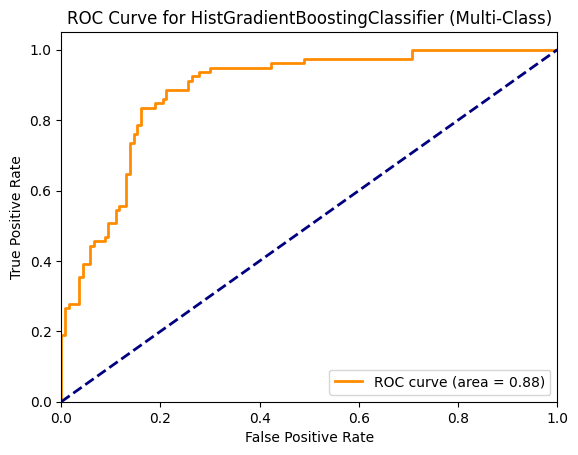

--------------------------------------------------------------------

Evaluation for KNeighborsClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        71
           1       0.75      0.59      0.66        66
           2       0.89      0.91      0.90        74

    accuracy                           0.80       211
   macro avg       0.79      0.79      0.79       211
weighted avg       0.80      0.80      0.79       211

Matthews Corrcoef: 0.6976
Accuracy Score: 0.7962
Precision: 0.7963
Recall: 0.7962
F1 Score: 0.7914
AUC Score: 0.9090

Cross Validation Results:
Fold 1: Accuracy=0.8104, Precision=0.8045, Recall=0.8039, F1=0.8010
Fold 2: Accuracy=0.7678, Precision=0.7709, Recall=0.7584, F1=0.7512
Fold 3: Accuracy=0.8294, Precision=0.8268, Recall=0.8248, F1=0.8239
Fold 4: Accuracy=0.8246, Precision=0.8206, Recall=0.8210, F1=0.8206
Fold 5: Accuracy=0.8152, Precision=0.8152, Recall=0.8121, F1=

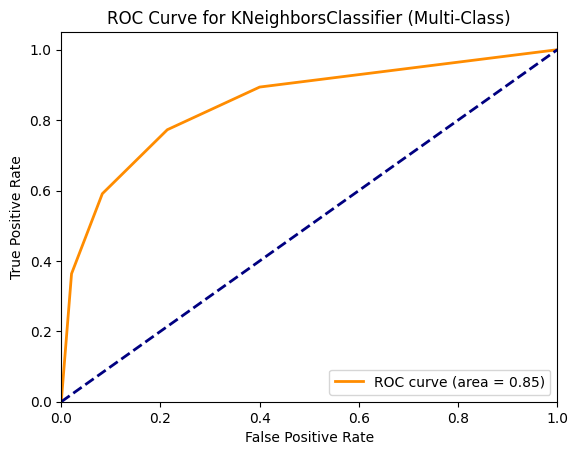

--------------------------------------------------------------------

Evaluation for DecisionTreeClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        71
           1       0.63      0.64      0.63        66
           2       0.86      0.85      0.86        74

    accuracy                           0.75       211
   macro avg       0.75      0.74      0.75       211
weighted avg       0.75      0.75      0.75       211

Matthews Corrcoef: 0.6229
Accuracy Score: 0.7488
Precision: 0.7499
Recall: 0.7488
F1 Score: 0.7493
AUC Score: 0.8100

Cross Validation Results:
Fold 1: Accuracy=0.7678, Precision=0.7616, Recall=0.7620, F1=0.7601
Fold 2: Accuracy=0.7488, Precision=0.7431, Recall=0.7429, F1=0.7425
Fold 3: Accuracy=0.8199, Precision=0.8158, Recall=0.8158, F1=0.8154
Fold 4: Accuracy=0.8152, Precision=0.8130, Recall=0.8106, F1=0.8102
Fold 5: Accuracy=0.7630, Precision=0.7662, Recall=0.7617, F

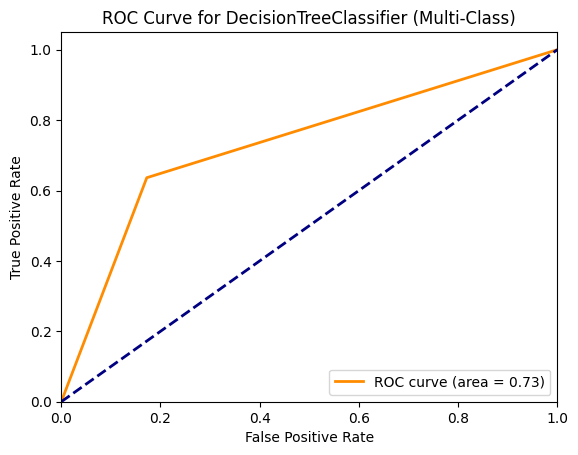

--------------------------------------------------------------------

Evaluation for RandomForestClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        71
           1       0.83      0.73      0.77        66
           2       0.90      0.96      0.93        74

    accuracy                           0.86       211
   macro avg       0.86      0.86      0.86       211
weighted avg       0.86      0.86      0.86       211

Matthews Corrcoef: 0.7945
Accuracy Score: 0.8626
Precision: 0.8605
Recall: 0.8626
F1 Score: 0.8601
AUC Score: 0.9423

Cross Validation Results:
Fold 1: Accuracy=0.8389, Precision=0.8352, Recall=0.8336, F1=0.8321
Fold 2: Accuracy=0.8199, Precision=0.8143, Recall=0.8124, F1=0.8101
Fold 3: Accuracy=0.8720, Precision=0.8674, Recall=0.8679, F1=0.8670
Fold 4: Accuracy=0.8720, Precision=0.8680, Recall=0.8674, F1=0.8665
Fold 5: Accuracy=0.8768, Precision=0.8760, Recall=0.8741, F

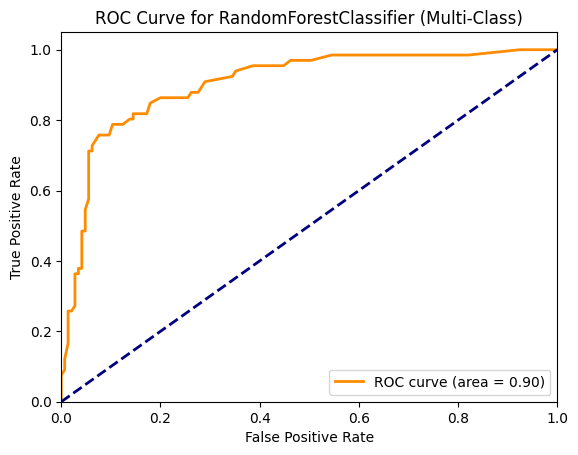

--------------------------------------------------------------------

Evaluation for SVC:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        71
           1       0.77      0.65      0.70        66
           2       0.85      0.92      0.88        74

    accuracy                           0.81       211
   macro avg       0.80      0.80      0.80       211
weighted avg       0.80      0.81      0.80       211

Matthews Corrcoef: 0.7094
Accuracy Score: 0.8057
Precision: 0.8030
Recall: 0.8057
F1 Score: 0.8022
AUC Score: 0.9193

Cross Validation Results:
Fold 1: Accuracy=0.7915, Precision=0.7912, Recall=0.7858, F1=0.7846
Fold 2: Accuracy=0.8057, Precision=0.8115, Recall=0.7982, F1=0.7955
Fold 3: Accuracy=0.8294, Precision=0.8299, Recall=0.8254, F1=0.8252
Fold 4: Accuracy=0.8436, Precision=0.8415, Recall=0.8394, F1=0.8384
Fold 5: Accuracy=0.8199, Precision=0.8175, Recall=0.8158, F1=0.8150
Cross Vali

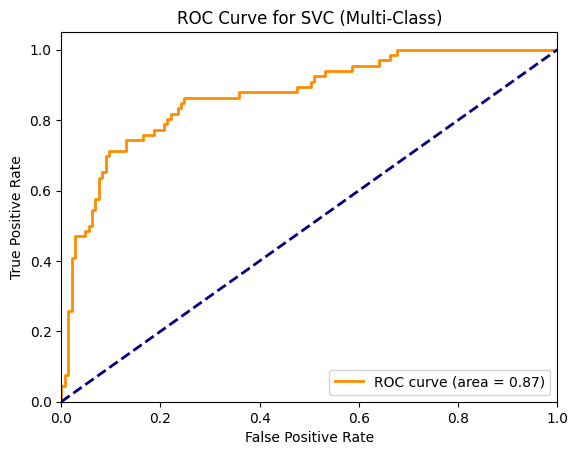

--------------------------------------------------------------------

Evaluation for MLPClassifier:

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        71
           1       0.80      0.74      0.77        66
           2       0.89      0.95      0.92        74

    accuracy                           0.85       211
   macro avg       0.84      0.84      0.84       211
weighted avg       0.85      0.85      0.85       211

Matthews Corrcoef: 0.7726
Accuracy Score: 0.8483
Precision: 0.8464
Recall: 0.8483
F1 Score: 0.8466
AUC Score: 0.9359


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



Cross Validation Results:
Fold 1: Accuracy=0.8436, Precision=0.8403, Recall=0.8399, F1=0.4663
Fold 2: Accuracy=0.8246, Precision=0.8221, Recall=0.8181, F1=0.8166
Fold 3: Accuracy=0.8673, Precision=0.8655, Recall=0.8649, F1=0.8649
Fold 4: Accuracy=0.8578, Precision=0.8577, Recall=0.8537, F1=0.8530
Fold 5: Accuracy=0.8673, Precision=0.8676, Recall=0.8653, F1=0.8651
Cross Validation Mean Accuracy: 0.8521
Cross Validation Mean Precision: 0.8506
Cross Validation Mean Recall: 0.8484
Cross Validation Mean F1 Score: 0.7732


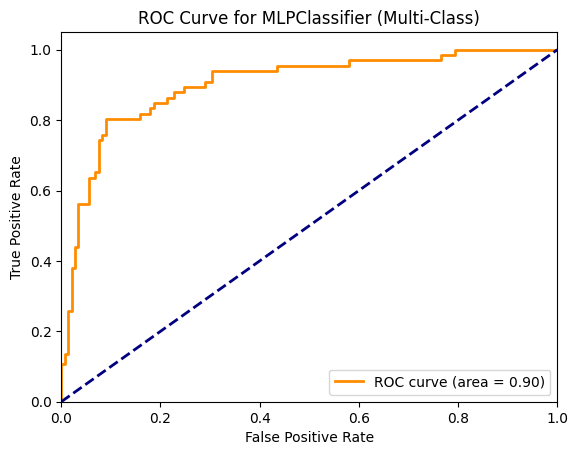

--------------------------------------------------------------------

Evaluation for CatBoostClassifier:


KeyboardInterrupt: 

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd

# Updated list of classifiers
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(kernel='rbf', random_state=42, probability=True),
    MLPClassifier(random_state=42),
    CatBoostClassifier(random_state=42, verbose=0),  # Set verbose to 0 to suppress output
    LGBMClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    BaggingClassifier(random_state = 42),
    HistGradientBoostingClassifier(random_state = 42)
]

# Assuming train_test_splits_smote contains train-test splits for subsets
for subset_name, splits in train_test_splits.items():
    # Get the train-test data
    X_train, X_test = splits['x_train'], splits['x_test']
    y_train, y_test = splits['y_train'], splits['y_test']

    # Combine train and test data for cross-validation
    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])

    for clf in classifiers:
        print(f"\nEvaluation for {clf.__class__.__name__}:")

        # Fit the classifier on training data
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Classification Report
        classification_report_result = classification_report(y_test, y_pred)
        print("\nClassification Report (Test Set):")
        print(classification_report_result)

        # Matthews Corrcoef
        mcc = matthews_corrcoef(y_test, y_pred)
        print(f"Matthews Corrcoef: {mcc:.4f}")

        # Accuracy Score
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy Score: {accuracy:.4f}")

        # Precision, Recall, F1 Score (weighted average)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")

        # AUC Score (One-vs-Rest for multi-class)
        try:
            auc_score = roc_auc_score(pd.get_dummies(y_test), clf.predict_proba(X_test), average='macro', multi_class='ovr')
            print(f"AUC Score: {auc_score:.4f}")
        except ValueError:
            print("AUC Score could not be calculated for this classifier.")

        # Cross-validation performance
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        try:
            cross_val_accuracies = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
            cross_val_precision = cross_val_score(clf, X, y, cv=skf, scoring='precision_macro')
            cross_val_recall = cross_val_score(clf, X, y, cv=skf, scoring='recall_macro')
            cross_val_f1 = cross_val_score(clf, X, y, cv=skf, scoring='f1_macro')

            print("\nCross Validation Results:")
            for i, (acc, prec, rec, f1) in enumerate(zip(cross_val_accuracies, cross_val_precision, cross_val_recall, cross_val_f1), 1):
                print(f"Fold {i}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

            # Mean cross-validation metrics
            cross_val_mean_accuracy = cross_val_accuracies.mean()
            cross_val_mean_precision = cross_val_precision.mean()
            cross_val_mean_recall = cross_val_recall.mean()
            cross_val_mean_f1 = cross_val_f1.mean()

            print(f"Cross Validation Mean Accuracy: {cross_val_mean_accuracy:.4f}")
            print(f"Cross Validation Mean Precision: {cross_val_mean_precision:.4f}")
            print(f"Cross Validation Mean Recall: {cross_val_mean_recall:.4f}")
            print(f"Cross Validation Mean F1 Score: {cross_val_mean_f1:.4f}")
        except Exception as e:
            print(f"Cross-validation could not be completed for {clf.__class__.__name__} due to an error: {e}")

        # Feature importance or ranking for tree-based classifiers (Top 5)
        if hasattr(clf, 'feature_importances_'):
            print("\nTop 5 Feature Ranking:")
            feature_importances = clf.feature_importances_
            feature_ranking = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)[:5]
            for i, (feature, importance) in enumerate(feature_ranking, 1):
                print(f"{i}. Feature {feature}: {importance:.4f}")

        # ROC Curve
        if hasattr(clf, 'predict_proba'):  # Only classifiers with predict_proba can be used
            fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=1)
            roc_auc = auc(fpr, tpr)
            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {clf.__class__.__name__} (Multi-Class)')
            plt.legend(loc="lower right")
            plt.show()

        print("--------------------------------------------------------------------")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4246
[LightGBM] [Info] Number of data points in the train set: 3525, number of used features: 75
[LightGBM] [Info] Start training from score -1.066784
[LightGBM] [Info] Start training from score -1.097762
[LightGBM] [Info] Start training from score -1.132367


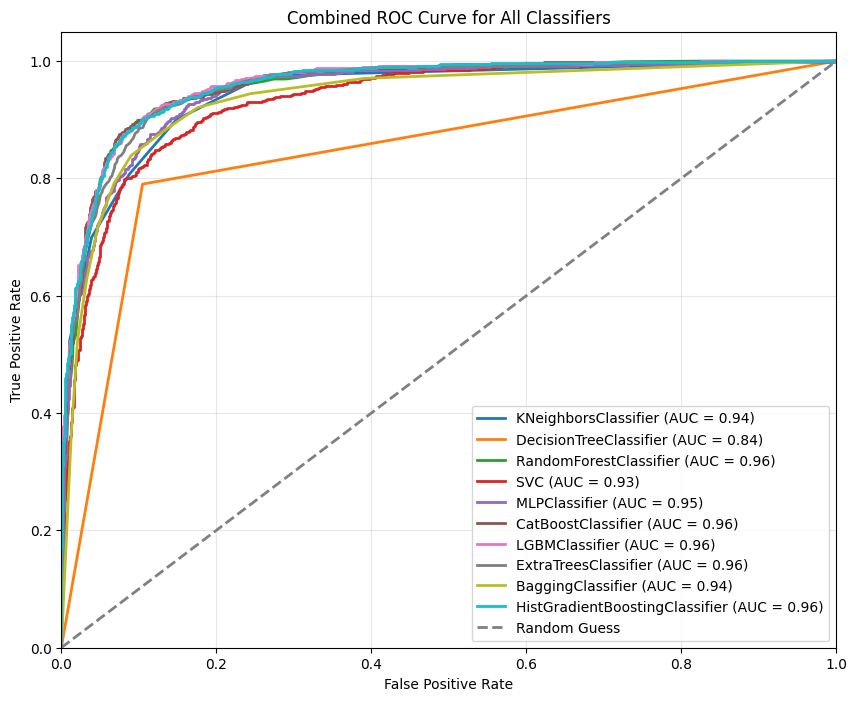

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2288
[LightGBM] [Info] Number of data points in the train set: 862, number of used features: 57
[LightGBM] [Info] Start training from score -1.338720
[LightGBM] [Info] Start training from score -1.013052
[LightGBM] [Info] Start training from score -0.981603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


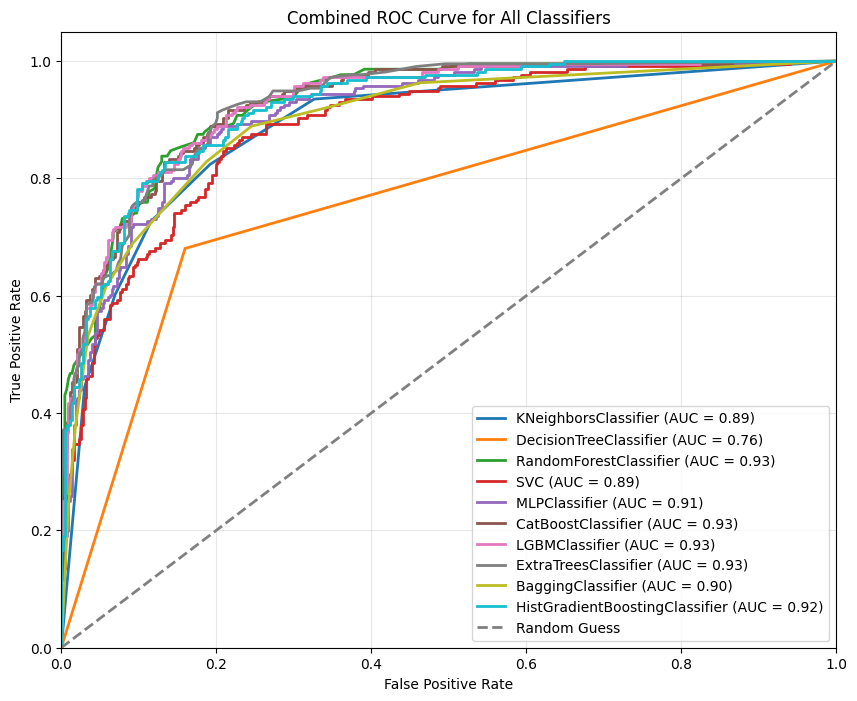

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1356
[LightGBM] [Info] Number of data points in the train set: 844, number of used features: 59
[LightGBM] [Info] Start training from score -1.096245
[LightGBM] [Info] Start training from score -1.162203
[LightGBM] [Info] Start training from score -1.041059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


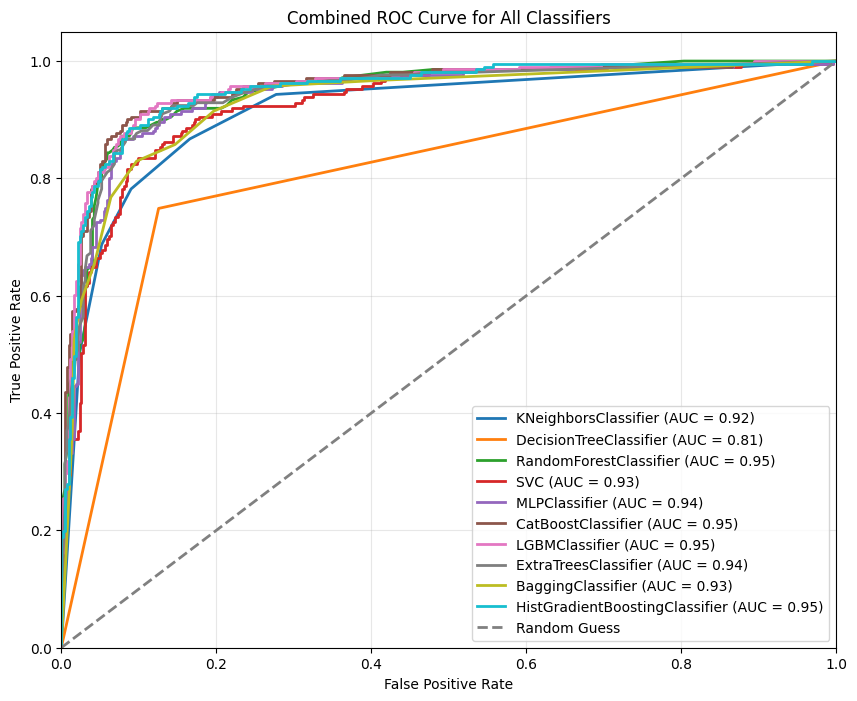

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 77, number of used features: 40
[LightGBM] [Info] Start training from score -2.041220
[LightGBM] [Info] Start training from score -0.878070
[LightGBM] [Info] Start training from score -0.788457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

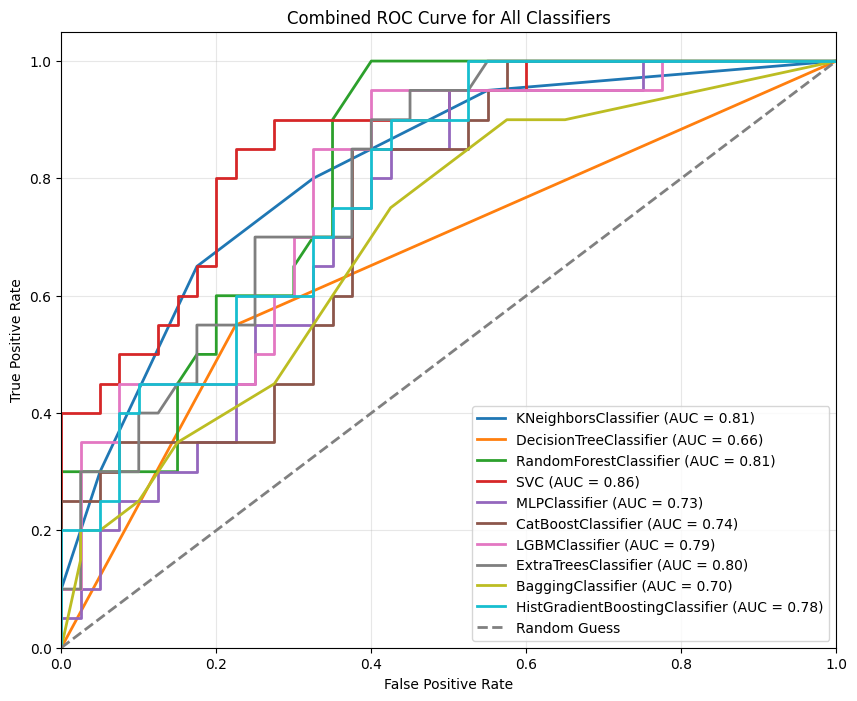

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

In [126]:
def plot_combined_roc_curve(classifiers, X_test, y_test):
    """
    Plots a combined ROC curve for multiple classifiers.
    """
    plt.figure(figsize=(10, 8))

    for clf in classifiers:
        if hasattr(clf, 'predict_proba'):  # Check if the classifier has predict_proba
            try:
                # Compute ROC curve and ROC area for multi-class (One-vs-Rest)
                fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(),
                                        clf.predict_proba(X_test).ravel())
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, lw=2, label=f'{clf.__class__.__name__} (AUC = {roc_auc:.2f})')
            except Exception as e:
                print(f"Error plotting ROC for {clf.__class__.__name__}: {e}")
        else:
            print(f"{clf.__class__.__name__} does not support predict_proba and will be skipped.")

    # Plot the diagonal (no-skill) line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')

    # Customize the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Combined ROC Curve for All Classifiers')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# Example usage
for subset_name, splits in train_test_splits.items():
    # Get the train-test data
    X_train, X_test = splits['x_train'], splits['x_test']
    y_train, y_test = splits['y_train'], splits['y_test']

    # Train the classifiers
    trained_classifiers = []
    for clf in classifiers:
        clf.fit(X_train, y_train)
        trained_classifiers.append(clf)

    # Plot the combined ROC curve
    plot_combined_roc_curve(trained_classifiers, X_test, y_test)

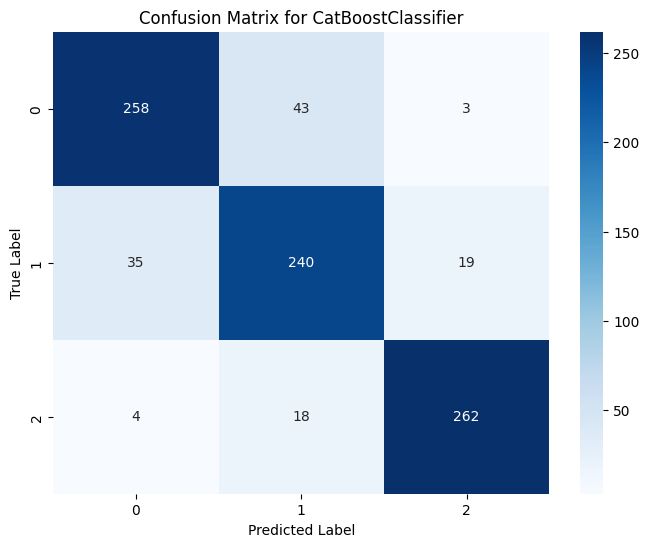

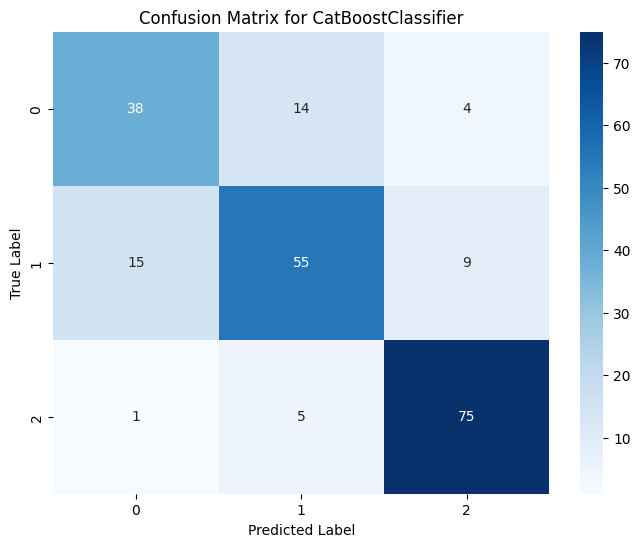

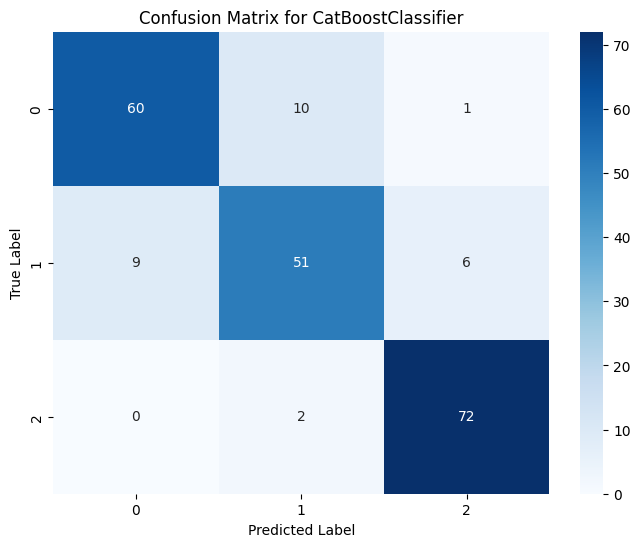

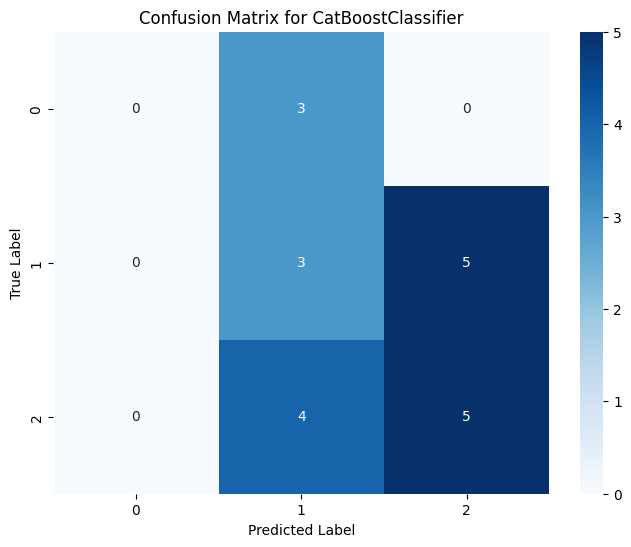

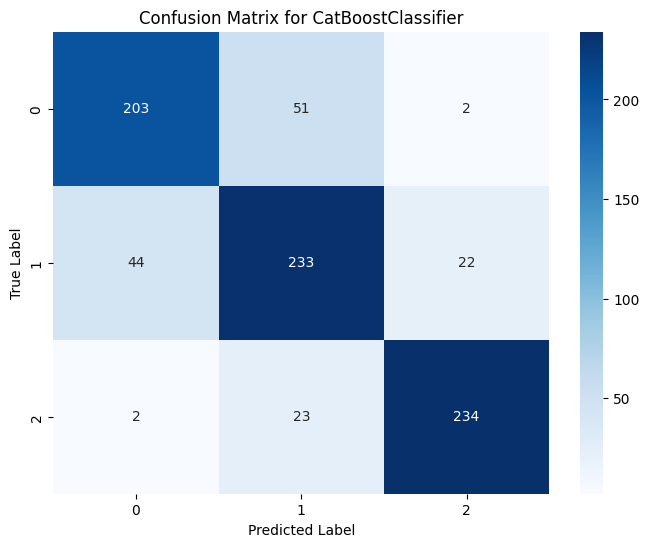

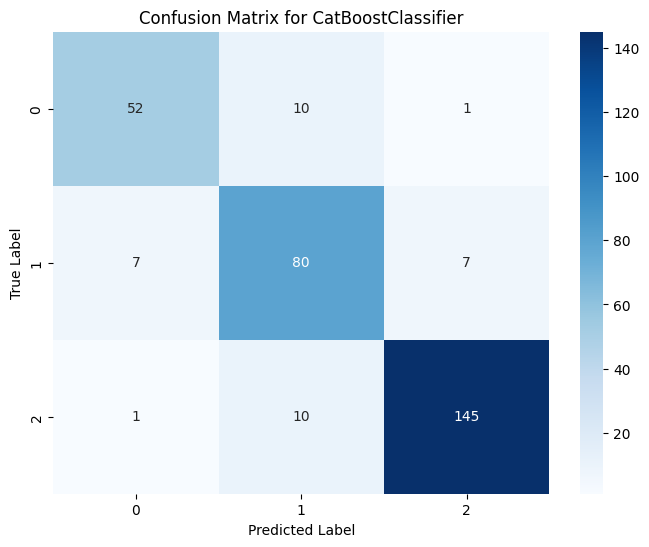

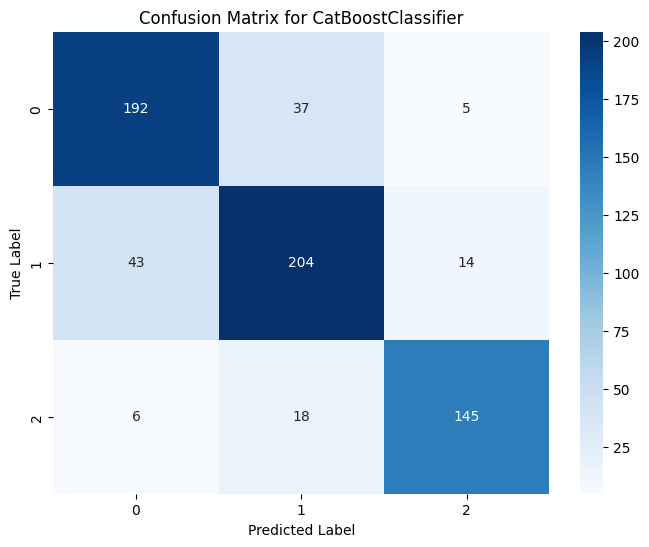

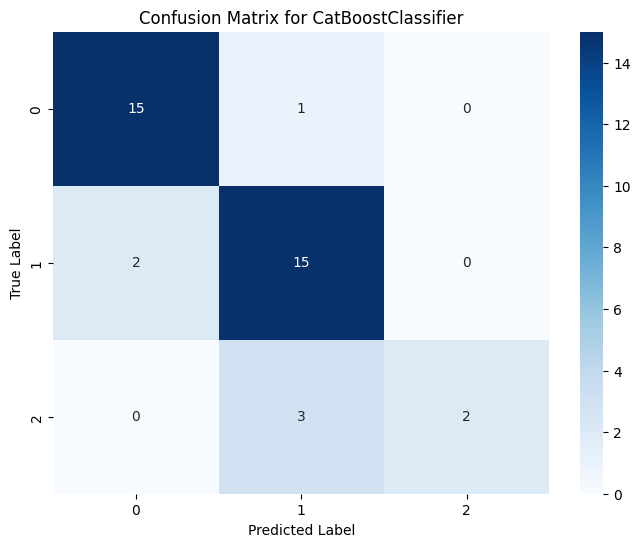

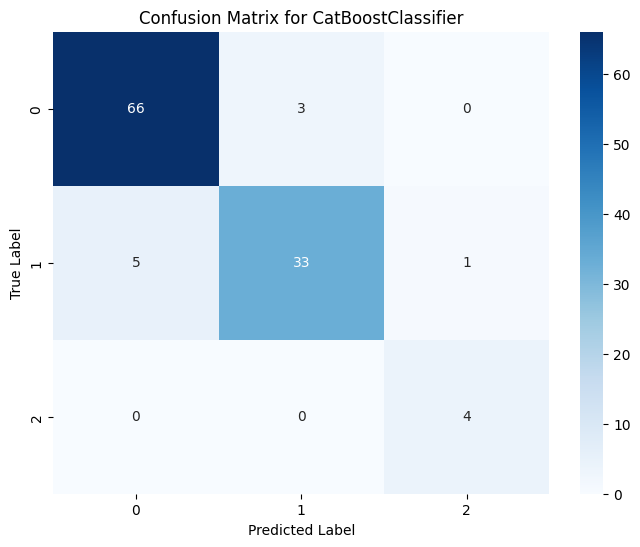

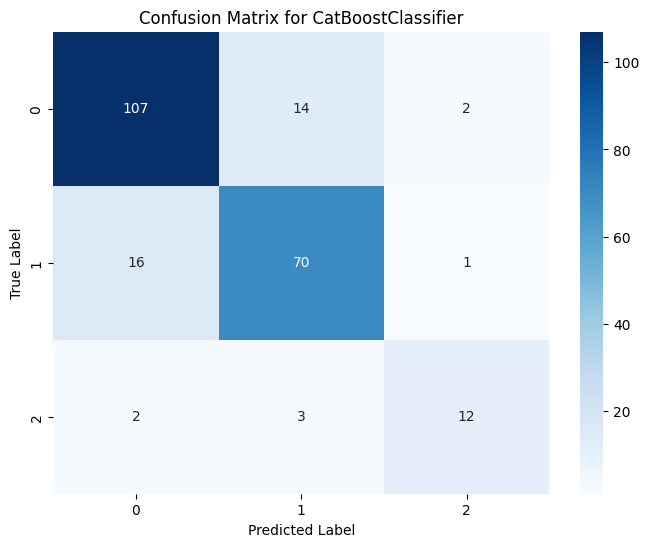

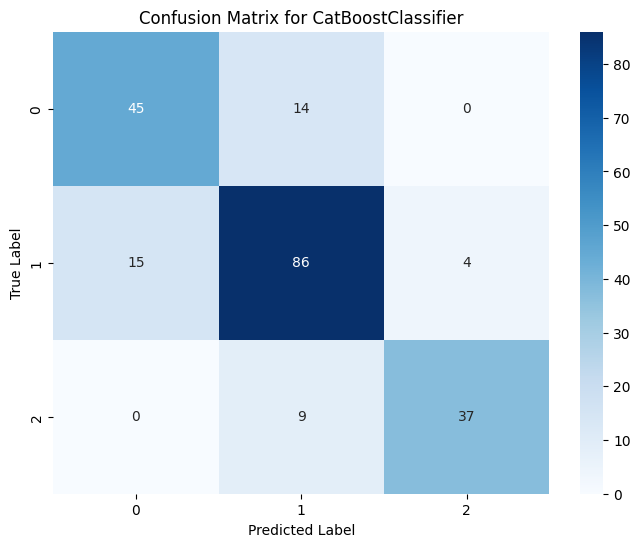

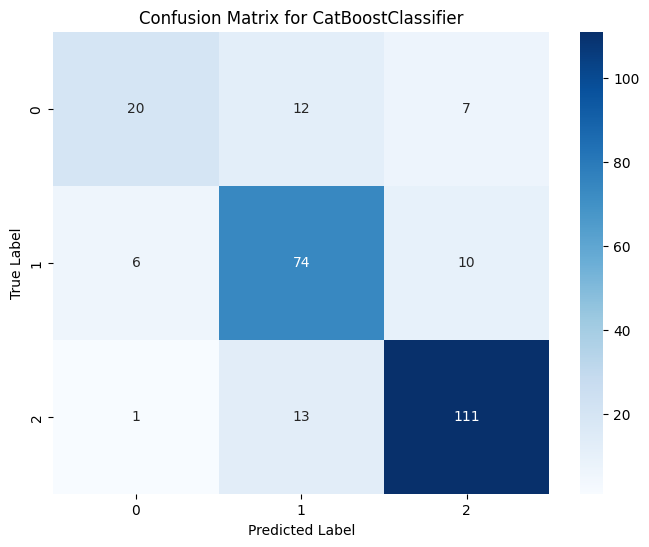

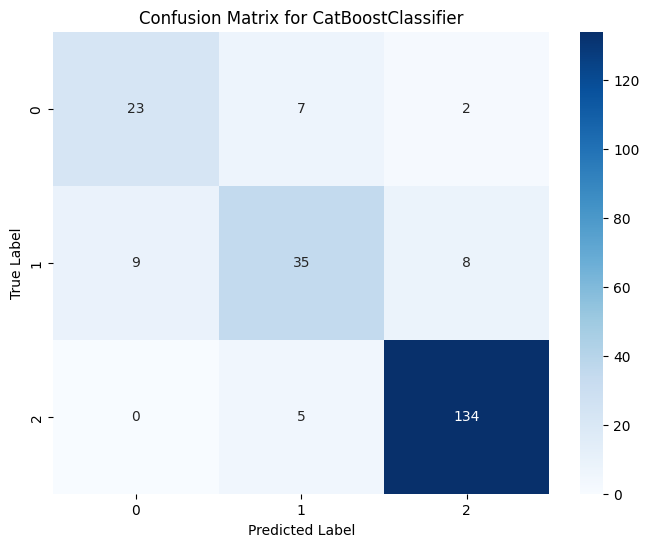

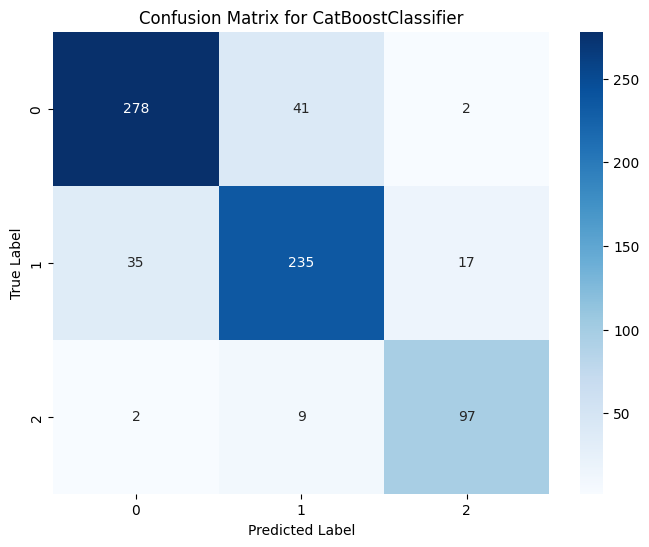

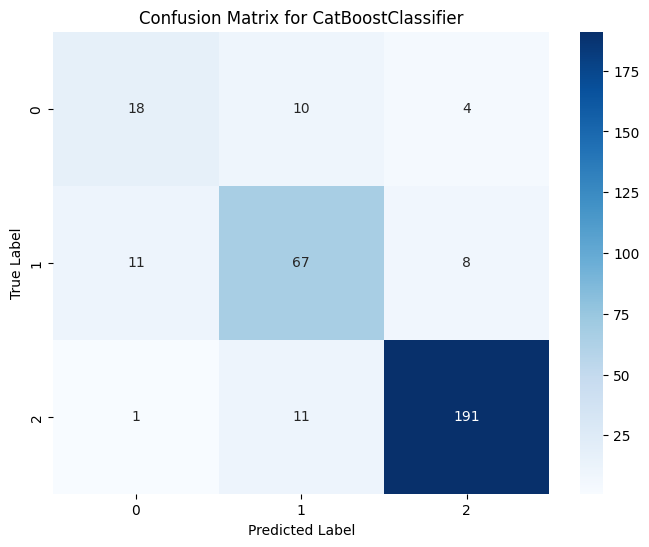

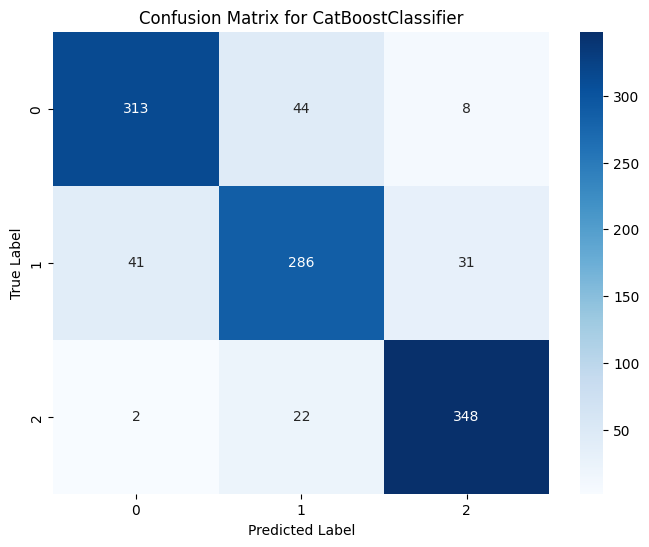

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(clf, X_test, y_test):
    """
    Plots the confusion matrix for the given classifier.
    """
    # Predict the labels for the test data
    y_pred = clf.predict(X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using seaborn heatmap for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {clf.__class__.__name__}')
    plt.show()

# Assuming you have trained the classifiers already, focus on CatBoost
for subset_name, splits in train_test_splits.items():
    # Get the train-test data
    X_train, X_test = splits['x_train'], splits['x_test']
    y_train, y_test = splits['y_train'], splits['y_test']

    # Train CatBoost
    catboost_clf = CatBoostClassifier(random_state=42, verbose=0)
    catboost_clf.fit(X_train, y_train)

    # Plot confusion matrix for CatBoost
    plot_confusion_matrix(catboost_clf, X_test, y_test)
